# **📚 University Ranking Analysis** ✨


# <span style="color:#4682B4; font-size: 1.5em;">🌍 Introduction</span>
In this project, my aim is to analyze and compare the <span style="color:#32CD32">**top 1,000 universities in the world**</span> using diverse data and <span style="color:#FFA500">**data science techniques**</span>. Given the importance of universities in shaping the future of societies and their impact on scientific and social advancements, understanding the characteristics and performance of these institutions is crucial.

Initially, I meticulously <span style="color:#FF6347">**cleaned the data**</span> and completed the preparation process. Afterward, I identified and addressed <span style="color:#8A2BE2">**missing values**</span> and <span style="color:#4682B4">**noise**</span>, and finally, I utilized <span style="color:#FF4500">**exploratory data analysis (EDA)**</span> to comprehend existing patterns and trends. These steps allowed me to select the best <span style="color:#32CD32">**visualization methods**</span> for a more accurate analysis of the data.

---

# <span style="color:#4682B4; font-size: 1.5em;">📊 Dataset Structure</span>
My dataset includes <span style="color:#FF6347">**10 key columns**</span>, detailed as follows:

1. <span style="color:#32CD32">**World Rank**</span>: The global ranking of the university, indicating its position on an international level.
2. <span style="color:#FFA500">**Institution**</span>: The name of the university, which aids in its identification.
3. <span style="color:#4682B4">**Location**</span>: The geographical location of the university, crucial for regional analysis.
4. <span style="color:#8A2BE2">**National Rank**</span>: The national ranking of the university, reflecting its standing within its country.
5. <span style="color:#FF6347">**Alumni Employment**</span>: The employment status of graduates, showcasing the quality of education and its relevance to the job market.
6. <span style="color:#32CD32">**Research Output**</span>: The volume of research produced by the university, representing its scholarly activity.
7. <span style="color:#FFA500">**Quality Publications**</span>: The quality of scientific publications, an indicator of the university's academic credibility.
8. <span style="color:#4682B4">**Influence**</span>: The university's influence in the scientific community and beyond.
9. <span style="color:#8A2BE2">**Citations**</span>: The number of citations of the university's published articles, indicating their academic impact.
10. <span style="color:#FF6347">**Score**</span>: The overall score of the university based on multiple criteria.

---

By utilizing a variety of **charts and visualization methods**, I have endeavored to conduct the best analyses and gain valuable insights. My ultimate goal is to achieve a deeper understanding of the conditions and characteristics of the world’s top universities and identify their **strengths and weaknesses**.

---


# <span style="color:#4682B4; font-size: 1.5em;">📦 Import Library</span>
In this section, I will import the necessary libraries required for data analysis and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pycountry pycountry-convert
import pycountry
import pycountry_convert as pc
import plotly.graph_objects as go
import plotly.express as px
from geopy.geocoders import Nominatim
import copy

from warnings import filterwarnings
filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.7/234.7 kB 10.8 MB/s eta 0:00:00


# Dara Preprossesing

### Read Data & Create DataFrame

In [2]:
data = pd.read_csv("/kaggle/input/university-ranking/university ranking.csv", encoding='unicode_escape')
df = pd.DataFrame(data)
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

In [3]:
df1 = df.copy()

In [4]:
df1.describe()

World Rank  National Rank        Score
count  1000.000000     1000.00000  1000.000000
mean    500.500000       40.02300    75.034300
std     288.819436       49.22871     4.670858
min       1.000000        1.00000    69.800000
25%     250.750000        6.00000    71.500000
50%     500.500000       21.00000    73.750000
75%     750.250000       51.00000    77.300000
max    1000.000000      213.00000   100.000000

In [5]:
#describtion of data and other values
df1.describe(include = "all")

World Rank         Institution Location  National Rank  \
count   1000.000000                1000     1000     1000.00000   
unique          NaN                1000       61            NaN   
top             NaN  Harvard University      USA            NaN   
freq            NaN                   1      213            NaN   
mean     500.500000                 NaN      NaN       40.02300   
std      288.819436                 NaN      NaN       49.22871   
min        1.000000                 NaN      NaN        1.00000   
25%      250.750000                 NaN      NaN        6.00000   
50%      500.500000                 NaN      NaN       21.00000   
75%      750.250000                 NaN      NaN       51.00000   
max     1000.000000                 NaN      NaN      213.00000   

       Quality of Education Alumni Employment Quality of Faculty  \
count                  1000              1000               1000   
unique                  404               492                221   
top                       -            > 1000                  -   
freq                    597               509                731   
mean                    NaN               NaN                NaN   
std                     NaN               NaN                NaN   
min                     NaN               NaN                NaN   
25%                     NaN               NaN                NaN   
50%                     NaN               NaN                NaN   
75%                     NaN               NaN                NaN   
max                     NaN               NaN                NaN   

       Research Output Quality Publications Influence Citations        Score  
count             1000                 1000      1000      1000  1000.000000  
unique             905                  892       830        75          NaN  
top             > 1000               > 1000    > 1000       898          NaN  
freq                77                   51       171       129          NaN  
mean               NaN                  NaN       NaN       NaN    75.034300  
std                NaN                  NaN       NaN       NaN     4.670858  
min                NaN                  NaN       NaN       NaN    69.800000  
25%                NaN                  NaN       NaN       NaN    71.500000  
50%                NaN                  NaN       NaN       NaN    73.750000  
75%                NaN                  NaN       NaN       NaN    77.300000  
max                NaN                  NaN       NaN       NaN   100.000000

# <span style="color:#FF6347; font-size: 1.5em;">❓ Missing Value</span>
In this section, I will identify and handle the missing values within the dataset to ensure clean and accurate data analysis.


In [6]:
# check NaN values
df1.isna().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

### Replace "-" to Nan

In [7]:
for col in df1:
    df1[col].replace('-', np.nan , inplace= True)

In [8]:
#Dtype and Null count
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  403 non-null    object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    269 non-null    object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


# <span style="color:#4682B4; font-size: 1.5em;">🔉 Noise</span>
In this section, I will detect and mitigate noise in the dataset to ensure the quality of the data remains intact for analysis.


### Replace >1000 to 1001

In [9]:
for col in df1.select_dtypes(include=['object']):  
    df1[col].replace('> 1000', 1001, inplace=True)

# replace 1001 to 1000
df1.replace(1001, 1000, inplace=True)

df1


World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                  NaN              1000                NaN   
996             17                  353               716                296   
997             56                  NaN              1000                NaN   
998             35                  NaN              1000                NaN   
999            108                  NaN               869                NaN   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1000                 1000       464       673   69.8  
996             798                  966      1000      1000   69.8  
997            1000                 1000       811       673   69.8  
998             881                 1000      1000       898   69.8  
999             923                  904       889      1000   69.8  

[1000 rows x 12 columns]

## Now delete two columns (Quality of Education & Quality of Faculty )

### we have to rename 2 of the column names because they have incorrect words and we cant delet 

In [10]:
# we check the columns names< because we get errors
for col in df1.columns:
    print(repr(col))

'World Rank'
'Institution'
'Location'
'National Rank'
'Quality\xa0of Education'
'Alumni Employment'
'Quality\xa0of Faculty'
'Research Output'
'Quality Publications'
'Influence'
'Citations'
'Score'


### we have to rename 2 of the column

In [11]:
df1.rename(columns={'Quality\xa0of Education': 'Quality of Education','Quality\xa0of Faculty'
                    : 'Quality of Faculty'}, inplace=True)

In [12]:
df2 = df1.drop(columns = ['Quality of Education' , 'Quality of Faculty'])
df2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Alumni Employment Research Output Quality Publications  \
0                1                 1               1                    1   
1                2                 3              10                    4   
2                3                11              30                   15   
3                1                19              12                    8   
4                2                25               9                    5   
..             ...               ...             ...                  ...   
995              3              1000            1000                 1000   
996             17               716             798                  966   
997             56              1000            1000                 1000   
998             35              1000             881                 1000   
999            108               869             923                  904   

    Influence Citations  Score  
0           1         1  100.0  
1           3         2   96.7  
2           2         6   95.1  
3           6        19   94.0  
4           7         4   93.2  
..        ...       ...    ...  
995       464       673   69.8  
996      1000      1000   69.8  
997       811       673   69.8  
998      1000       898   69.8  
999       889      1000   69.8  

[1000 rows x 10 columns]

Considering the lower correlation of these two columns with the target variable compared to others, we have decided to remove them from the dataset.

In [13]:
#Dtype and Null count
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Alumni Employment     1000 non-null   object 
 5   Research Output       1000 non-null   object 
 6   Quality Publications  1000 non-null   object 
 7   Influence             1000 non-null   object 
 8   Citations             1000 non-null   object 
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


### Change type of columns to int

In [14]:
for col in[ 'Alumni Employment', 'Research Output','Quality Publications' , 'Influence']:
    df2[col] = df2[col].astype(int)
df2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
3                1                 19               12                     8   
4                2                 25                9                     5   
..             ...                ...              ...                   ...   
995              3               1000             1000                  1000   
996             17                716              798                   966   
997             56               1000             1000                  1000   
998             35               1000              881                  1000   
999            108                869              923                   904   

     Influence Citations  Score  
0            1         1  100.0  
1            3         2   96.7  
2            2         6   95.1  
3            6        19   94.0  
4            7         4   93.2  
..         ...       ...    ...  
995        464       673   69.8  
996       1000      1000   69.8  
997        811       673   69.8  
998       1000       898   69.8  
999        889      1000   69.8  

[1000 rows x 10 columns]

In [15]:
#Dtype and Null count
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Alumni Employment     1000 non-null   int64  
 5   Research Output       1000 non-null   int64  
 6   Quality Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   object 
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 78.2+ KB


In [16]:
# check duplicated data
df2.duplicated().sum()

0

In [17]:
df2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
3                1                 19               12                     8   
4                2                 25                9                     5   
..             ...                ...              ...                   ...   
995              3               1000             1000                  1000   
996             17                716              798                   966   
997             56               1000             1000                  1000   
998             35               1000              881                  1000   
999            108                869              923                   904   

     Influence Citations  Score  
0            1         1  100.0  
1            3         2   96.7  
2            2         6   95.1  
3            6        19   94.0  
4            7         4   93.2  
..         ...       ...    ...  
995        464       673   69.8  
996       1000      1000   69.8  
997        811       673   69.8  
998       1000       898   69.8  
999        889      1000   69.8  

[1000 rows x 10 columns]

# <span style="color:#4CAF50; font-size: 1.5em;">📊 Exploratory Data Analysis (EDA)</span>
This section involves exploring the dataset to uncover patterns, trends, and relationships that will assist in drawing insights for further analysis.


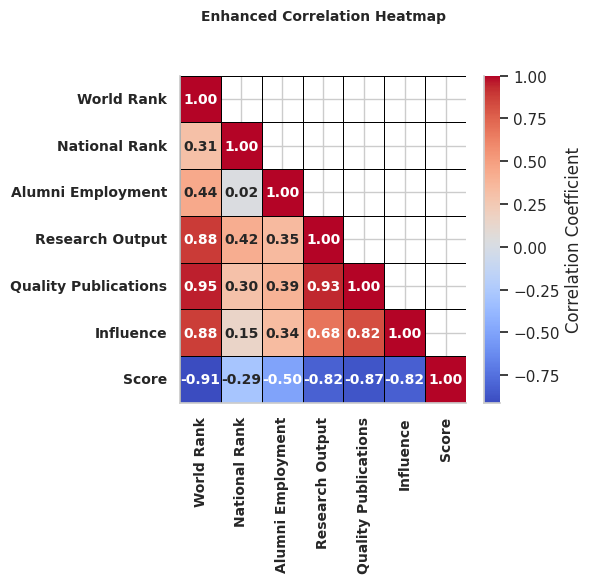

In [18]:
#correlation Heatmap
df_numeric = df2.select_dtypes(include=['int32', 'int64', 'float64'])

corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(6, 6)) 
sns.set(style="whitegrid")  

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                      linewidths=0.5, linecolor='black', annot_kws={"size": 10, "weight": "bold"}, 
                      cbar_kws={'label': 'Correlation Coefficient'}, mask=mask)
plt.title('Enhanced Correlation Heatmap', fontsize=10, weight='bold', pad=40)
plt.xticks(rotation=90, fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

sns.despine()

plt.tight_layout() 
plt.show()

 Between 0 and 1: This range reflects a moderate positive correlation. It suggests that when one variable goes up, the other tends to rise as well, though not in a very strong manner.

Between -1 and 0: This range indicates a strong negative correlation. Here, as one variable increases, the other usually decreases significantly. The closer the value is to -1, the stronger this negative relationship becomes.

Exactly 1: This value signifies a perfect positive correlation, meaning the two variables move in complete harmony; when one increases, the other also rises proportionally.


In [19]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install folium geopy tqdm

# <span style="color:#FF5722; font-size: 1.5em;">📈 Draw Plot</span>
Here, I will visualize the data using various plotting techniques to better understand patterns and relationships.


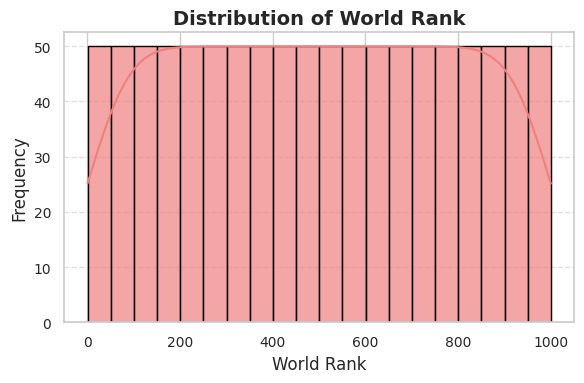

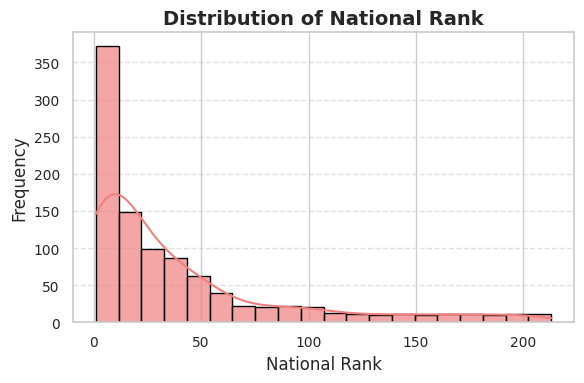

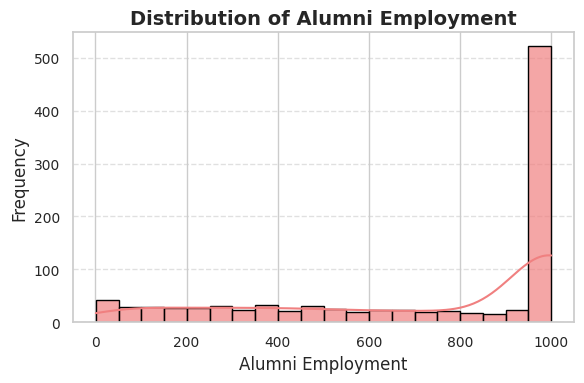

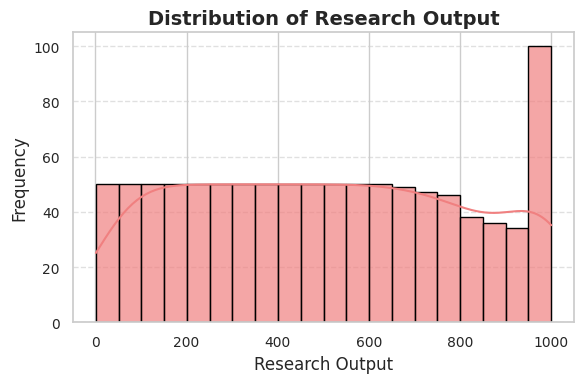

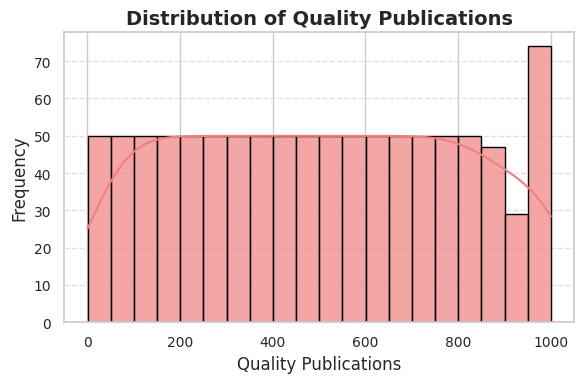

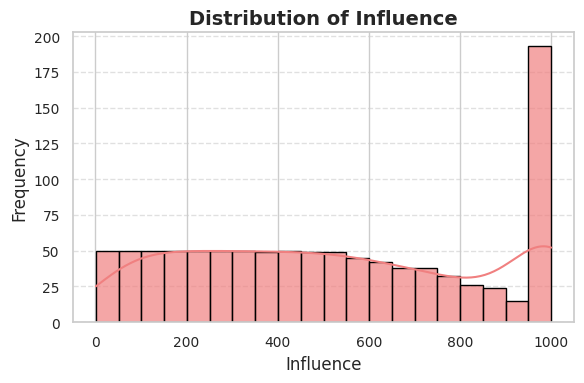

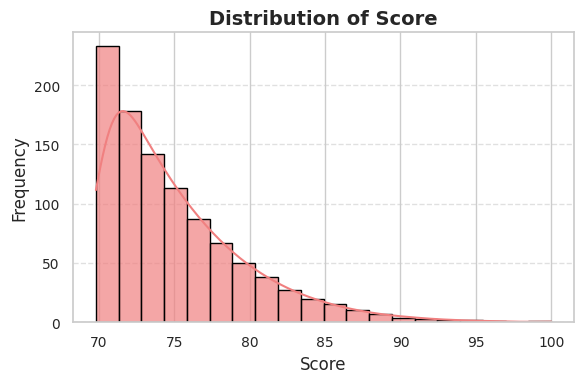

In [21]:
# Check for numeric columns
numeric_cols = df2.select_dtypes(['float64', 'int64', 'int32']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))  
    sns.histplot(df2[col], bins=20, kde=True, color='lightcoral', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14, weight='bold')  # Title with bold font
    plt.xlabel(col, fontsize=12)  # Label the x-axis
    plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
    plt.xticks(fontsize=10)  # Font size for x-axis ticks
    plt.yticks(fontsize=10)  # Font size for y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.6)  
    plt.tight_layout()  
    plt.show()


<span style="color:#4A90E2; font-size:1.2em;">**The distributions of `World Rank`, `Alumni Employment`, `Research Output`, `Influence`, and `Quality Publications` appear to be nearly uniform**,</span> indicating a balanced representation across these metrics. This suggests that universities perform relatively consistently in these areas without extreme variations. 

In contrast, <span style="color:#E74C3C; font-size:1.2em;">**the `National Rank` and `Score` features exhibit a leftward skew,**</span> implying that a significant number of institutions have lower ranks and scores, with fewer institutions achieving higher values. 

<span style="font-weight:bold; color:#16A085;">**This skewness may indicate competitive disparities among universities, where a majority struggle to attain top rankings and scores.**</span>


# 

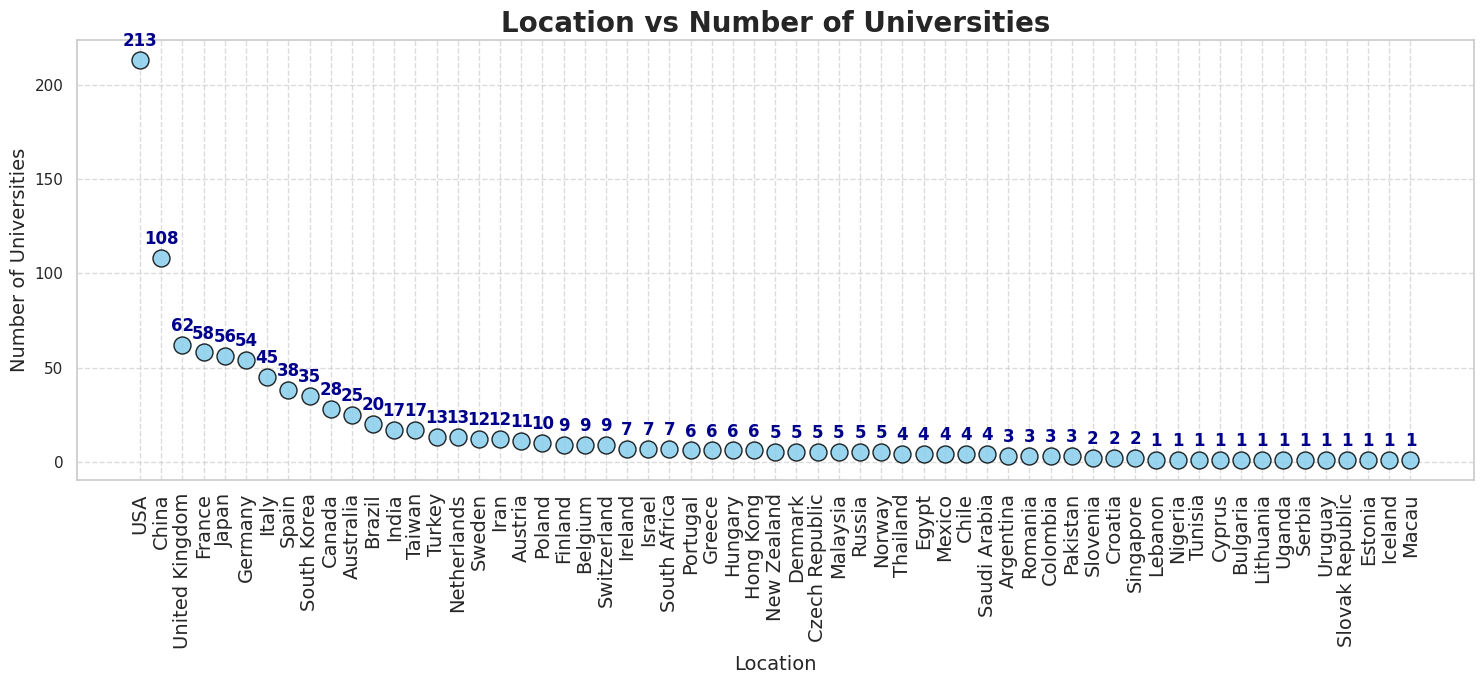

In [22]:
location_counts = df2["Location"].value_counts()

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")  
plt.scatter(location_counts.index, location_counts.values, 
            color='skyblue', s=150, edgecolor='black', alpha=0.85) 
plt.title("Location vs Number of Universities", fontsize=20, weight='bold')  
plt.xlabel("Location", fontsize=14)  # X-axis label
plt.xticks(rotation=90, fontsize=14)  # Rotate labels
plt.ylabel("Number of Universities", fontsize=14)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines

# Annotate the number of universities above each point
for i in range(len(location_counts)):
    plt.annotate(location_counts.values[i], 
                 (location_counts.index[i], location_counts.values[i]), 
                 textcoords="offset points", 
                 xytext=(0, 10),  
                 ha='center', 
                 fontsize=12, 
                 color='darkblue', 
                 weight='bold')  

plt.tight_layout() 
plt.show()

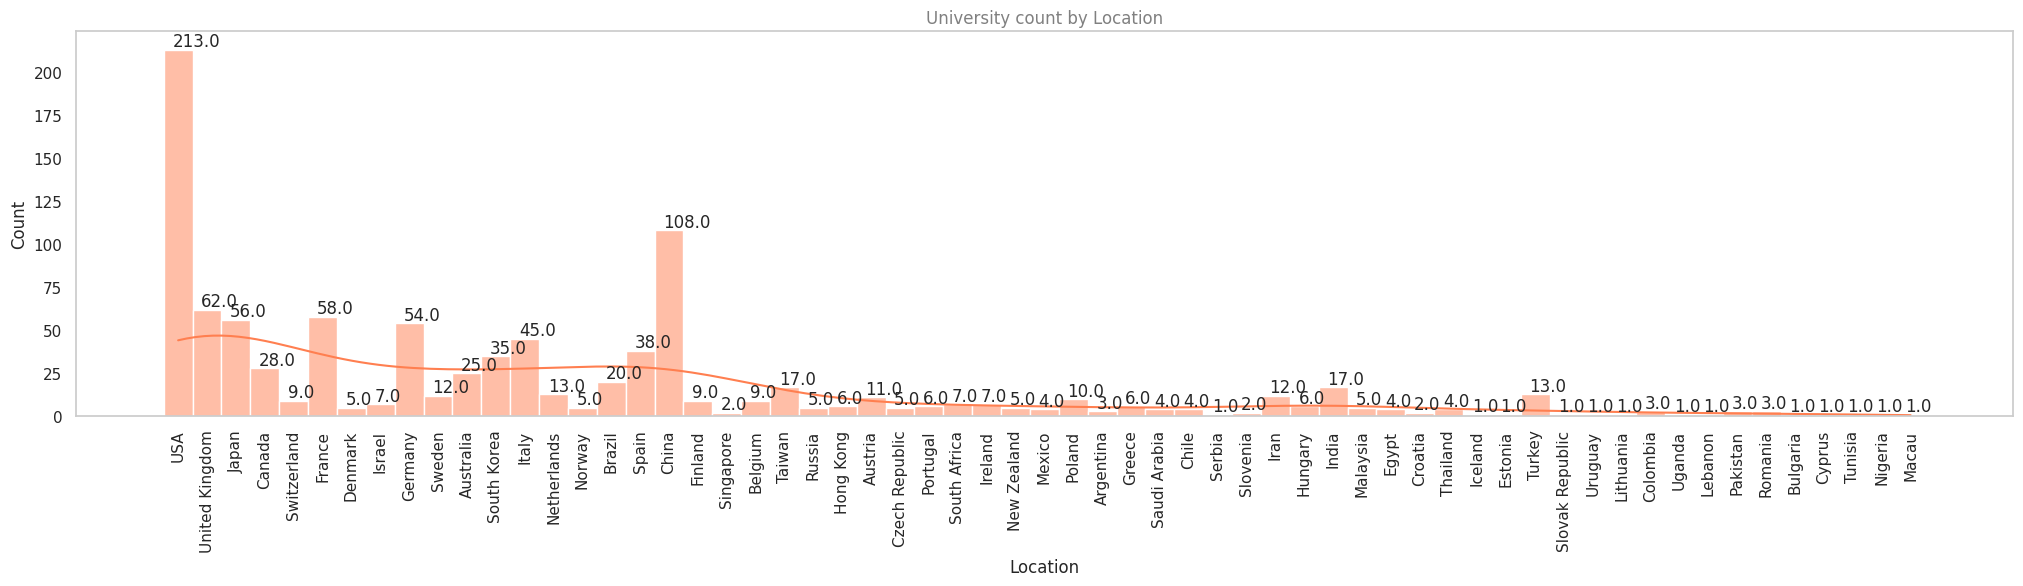

In [23]:
#seaborn plot (exact number)
plt.figure(figsize=(25,5)) 
var = sns.histplot(data= df2, x= 'Location', kde= True, color='coral') 
plt.title('University count by Location', c='gray', loc='center') 
plt.xticks(rotation=90)
for p in var.patches: 
        var.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
plt.grid()

In [24]:
(df2['Location'].value_counts()).mean()

16.39344262295082

#### USA with 231 is the top country in the list.
##### secend place is china with 108.
###### 3rd country is UK with 62 universities.

#


In [25]:
#university count by country
country_count =df2["Location"].value_counts()
country_count

Location
USA                213
China              108
United Kingdom      62
France              58
Japan               56
                  ... 
Uruguay              1
Slovak Republic      1
Estonia              1
Iceland              1
Macau                1
Name: count, Length: 61, dtype: int64

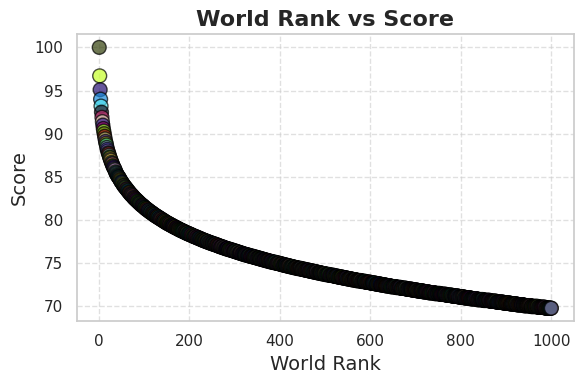

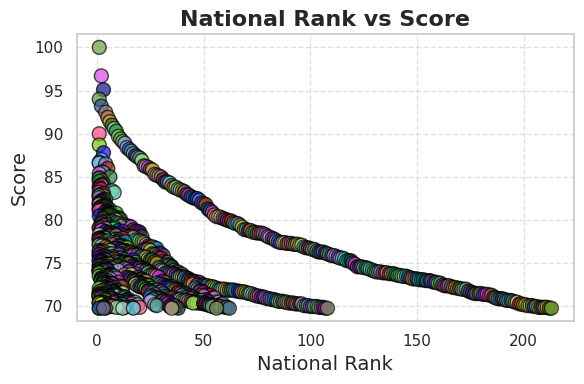

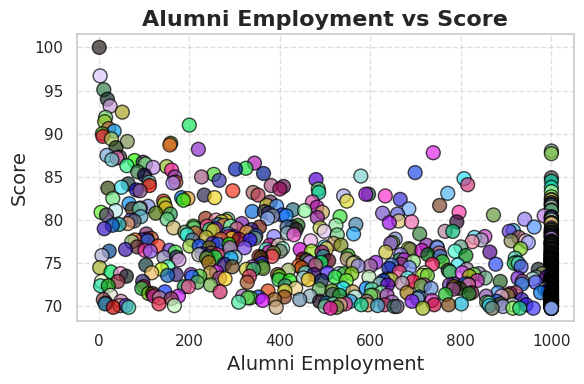

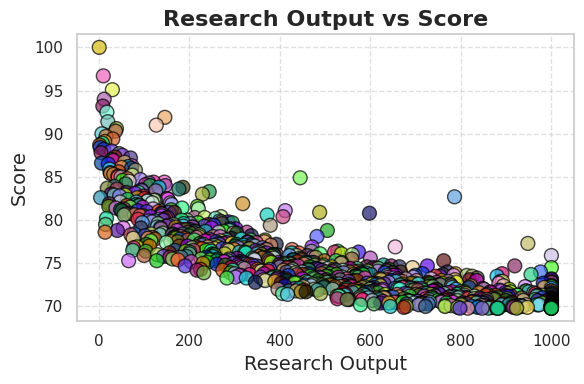

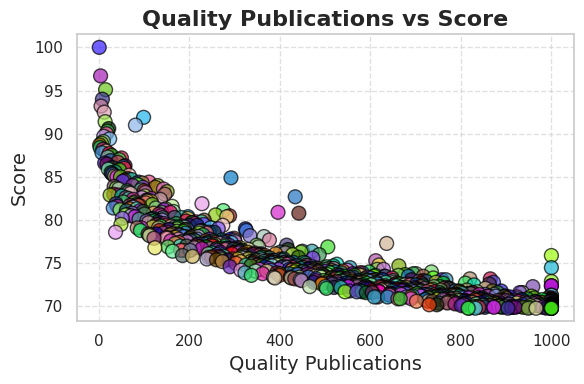

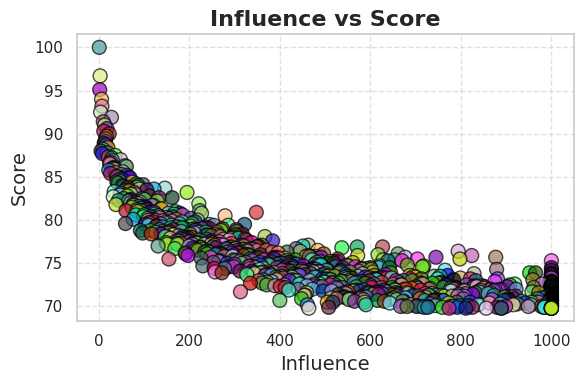

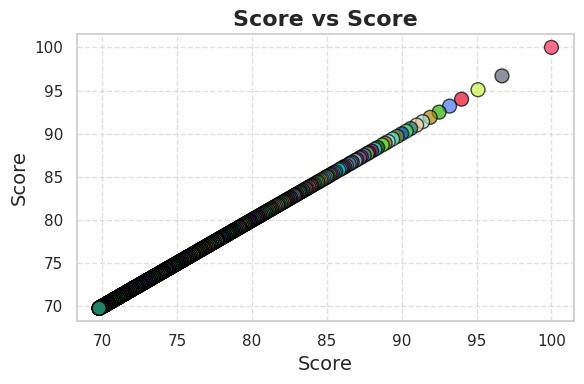

In [26]:
for col in df2.select_dtypes(['int', 'float']).columns:
    plt.figure(figsize=(6, 4))
    
    colors = np.random.rand(len(df2), 3)  

    plt.scatter(df2[col], df2['Score'], color=colors, s=100, edgecolor='black', alpha=0.7)
    
    plt.title(f'{col} vs Score', fontsize=16, fontweight='bold')  
    plt.xlabel(col, fontsize=14) 
    plt.ylabel('Score', fontsize=14)  
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.tight_layout()  
    plt.show()

<span style="color:#4A90E2; font-size:1.2em;">**Given that the correlation analysis indicates the highest correlation with the `Score` column,**</span> we will create scatter plots comparing `Score` with other numerical columns. 

As observed, <span style="color:#E74C3C; font-size:1.2em;">**the `Score` exhibits an inverse relationship with the other displayed columns.**</span>


# 

In [27]:
df2['Score'].mean()

75.03429999999999

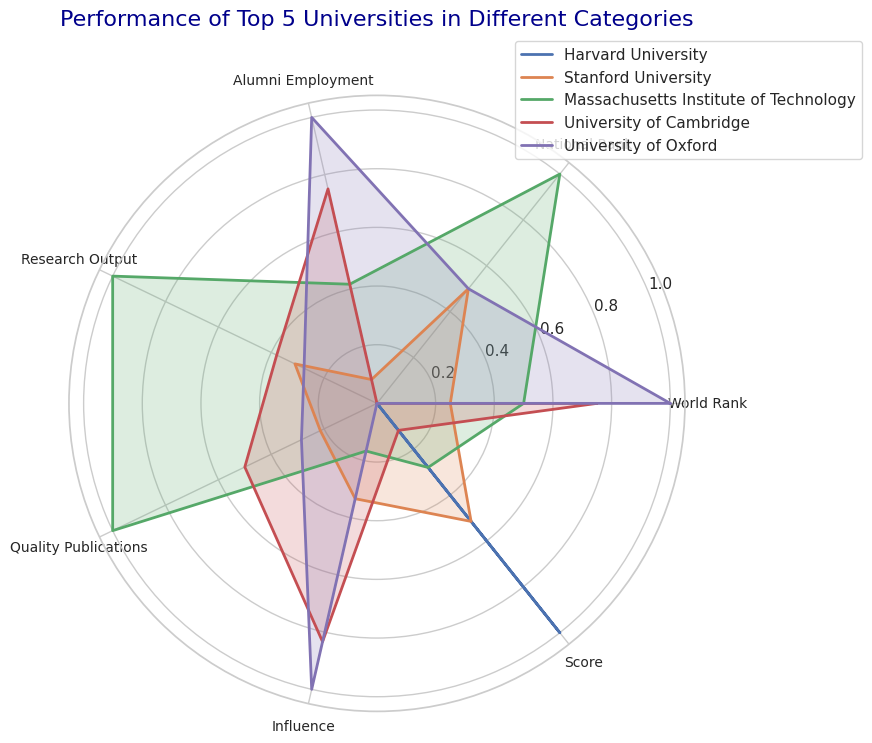

In [28]:
from math import pi

# Select the first 5 universities and relevant numeric columns
df_top5 = df2.head(5)
categories = ['World Rank', 'National Rank', 'Alumni Employment', 
              'Research Output', 'Quality Publications', 'Influence', 'Score']

# Normalize the data for better visualization (values between 0 and 1)
df_top5_normalized = df_top5[categories].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # To close the plot

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each university's performance
for i, row in df_top5_normalized.iterrows():
    data = row.tolist()
    data += data[:1]  # To close the plot
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=df_top5['Institution'].iloc[i])
    ax.fill(angles, data, alpha=0.2)

# Add labels and title
plt.xticks(angles[:-1], categories, fontsize=10)
plt.title('Performance of Top 5 Universities in Different Categories', size=16, color='darkblue', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


<span style="color:#4A90E2; font-size:1.5em; font-weight:bold;">📊 **Radar Chart Analysis of Top Five Universities**</span>
<span style="color:#4A90E2; font-size:1.2em;">This radar chart compares the performance of five top universities (Harvard, Stanford, MIT, University of Cambridge, and University of Oxford) across six different criteria, such as Alumni Employment, Research Output, and more.</span>

Each colored line represents one university, and the axes show the various performance metrics. Here’s a detailed analysis:

1. <span style="color:#2980B9; font-weight:bold;">**Harvard University (Blue Line):**</span>
   - **Alumni Employment:** Harvard stands out with the highest performance, indicating its graduates achieve significant success in their careers.
   - **Research Output:** A bit lower compared to other universities (especially MIT), suggesting Harvard’s focus might lean more toward education and alumni networks rather than pure research.
   - **World Rank:** Surprisingly lower than others, which could reflect a broader focus beyond just academic ranking.

2. <span style="color:#E67E22; font-weight:bold;">**Stanford University (Orange Line):**</span>
   - Shows average performance in most categories, except for World Rank, where it scores notably low.
   - Research Output and Influence are relatively strong, though Alumni Employment is weaker than expected.

3. <span style="color:#27AE60; font-weight:bold;">**MIT (Green Line):**</span>
   - **World Rank and Research Output:** MIT excels in these areas, positioning itself as a global leader in scientific research and overall rankings.
   - **Alumni Employment:** Decent, but not as strong as Harvard.
   - **Influence:** Scores lower here, which may suggest a focus on innovation and technology over social or global impact.

4. <span style="color:#8E44AD; font-weight:bold;">**University of Cambridge (Purple Line):**</span>
   - Shows a balanced performance across all metrics, without any particular standout. However, Influence and Research Output are comparatively weaker.
   - Overall, Cambridge appears more modest in performance compared to MIT and Harvard in these specific areas.

5. <span style="color:#C0392B; font-weight:bold;">**University of Oxford (Red Line):**</span>
   - **Research Output and World Rank:** Oxford doesn't perform as well here, trailing behind other institutions.
   - However, it scores higher in Influence and Quality Publications, indicating a strong qualitative impact in some areas, despite weaker quantitative measures.

<span style="color:#4A90E2; font-size:1.5em; font-weight:bold;">📝 Overall Conclusion:</span>
- **Harvard** excels in Alumni Employment, reflecting its strong alumni network and job success.
- **MIT** dominates in research and global rankings, though it may not have the same social or broader influence as Harvard.
- **Cambridge** and **Oxford** are balanced performers but show particular strengths in social influence and publication quality.
- **Stanford** shows mixed performance, excelling in research but falling short in global rankings and alumni employment.


In [29]:
#American universities
df_us= df2.loc[df2['Location'] == 'USA']
df_us

World Rank                                    Institution Location  \
0             1                             Harvard University      USA   
1             2                            Stanford University      USA   
2             3          Massachusetts Institute of Technology      USA   
5             6             University of California, Berkeley      USA   
6             7                           Princeton University      USA   
..          ...                                            ...      ...   
976         977  Missouri University of Science and Technology      USA   
979         980                Eastern Virginia Medical School      USA   
980         981     University of North Carolina at Greensboro      USA   
992         993             University of Massachusetts Lowell      USA   
993         994                          Loma Linda University      USA   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
5                4                 52               18                    12   
6                5                 15              146                    99   
..             ...                ...              ...                   ...   
976            209                392              916                   827   
979            210               1000             1000                  1000   
980            211               1000             1000                   938   
992            212                930             1000                   989   
993            213               1000             1000                   949   

     Influence Citations  Score  
0            1         1  100.0  
1            3         2   96.7  
2            2         6   95.1  
5            4         8   92.5  
6           28        27   91.9  
..         ...       ...    ...  
976       1000      1000   69.9  
979        792       327   69.9  
980       1000       673   69.9  
992       1000       541   69.8  
993        890       898   69.8  

[213 rows x 10 columns]

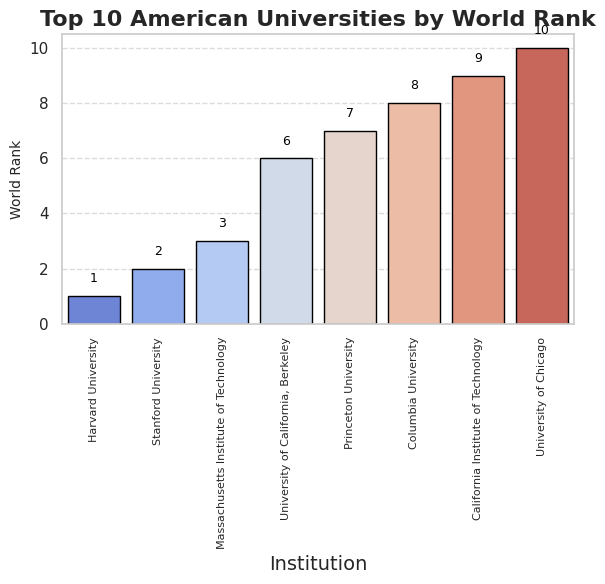

In [30]:
# Filter American universities with rank up to 10
df_us_top10 = df_us[df_us['World Rank'] <= 10]

plt.figure(figsize=(6, 6))

# Draw a bar plot with seaborn for 
sns.barplot(data=df_us_top10, x='Institution', y='World Rank', palette='coolwarm', edgecolor='black')

# Set title and labels
plt.title('Top 10 American Universities by World Rank', fontsize=16, fontweight='bold')
plt.xlabel('Institution', fontsize=14)
plt.ylabel('World Rank', fontsize=10)
plt.xticks(rotation=90, fontsize=8)  # Rotate X-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y-axis grid lines

# Display values above each bar
for index, value in enumerate(df_us_top10['World Rank']):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9, color='black')

plt.tight_layout()  
plt.show()

"We included the top 10 universities in the chart and observed that the highest rank is for Harvard University, while the rank 10 belongs to the University of Chicago. This analysis allows for a better understanding of American universities up to the global ranking.

In [31]:
import plotly.express as px

# Filter for the top 15 universities in the US
df_us_top15 = df_us.head(15)

# Melt the DataFrame for better plotting
df_melted = df_us_top15.melt(id_vars='Institution', value_vars=['World Rank', 'National Rank', 'Alumni Employment', 
                                                                'Research Output', 'Quality Publications', 
                                                                'Influence', 'Citations', 'Score'], 
                               var_name='Variable', value_name='Value')

# Create a bar plot
plot_us = px.bar(df_melted, 
                  x='Institution', 
                  y='Value', 
                  color='Variable', 
                  barmode='group', 
                  text='Value',
                  height=600,
                  title="Top 15 American Universities by Location vs All Variables",
                  color_discrete_sequence=px.colors.qualitative.Set1)  
plot_us.update_layout(
    title_font=dict(size=20, family="Arial, Bold"),
    xaxis_title="Institution",
    yaxis_title="Values",
    xaxis_tickangle=-90,
    xaxis=dict(tickmode='linear'),  
    template='plotly_white'
)

# Show plot
plot_us.show()


<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**This chart compares the top 15 American universities by location across all variables in your dataset.**</span> The horizontal axis represents the university names, while the vertical axis indicates the values of various variables such as <span style="color:#E74C3C; font-weight:bold;">"World Rank,"</span> <span style="color:#E74C3C; font-weight:bold;">"National Rank,"</span> <span style="color:#E74C3C; font-weight:bold;">"Alumni Employment,"</span> <span style="color:#E74C3C; font-weight:bold;">"Research Output,"</span> <span style="color:#E74C3C; font-weight:bold;">"Quality Publications,"</span> <span style="color:#E74C3C; font-weight:bold;">"Influence,"</span> <span style="color:#E74C3C; font-weight:bold;">"Citations,"</span> and <span style="color:#E74C3C; font-weight:bold;">"Score."</span>

<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Key observations from the analysis:**</span>

- <span style="color:#27AE60; font-weight:bold;">**Large fluctuations in certain variables:**</span> The "World Rank" and "Citations" values are particularly high for universities like the California Institute of Technology and Harvard University. This suggests their strong global standing and high citation rates of their research.

- <span style="color:#27AE60; font-weight:bold;">**Variation in variable scales:**</span> Variables such as "National Rank" and "Research Output" show relatively lower values compared to others, but they still play an important role in the overall assessment of the universities.

- <span style="color:#27AE60; font-weight:bold;">**Color-coded categories:**</span> Each variable is color-coded, allowing viewers to easily distinguish how each university performs across different metrics.

- <span style="color:#27AE60; font-weight:bold;">**Outstanding universities:**</span> Institutions like the California Institute of Technology and the University of Michigan stand out with consistently high values across multiple variables, indicating their broad influence in various academic areas.


In [32]:
#chinese universities
df_china= df2.loc[df2['Location'] == 'China']
df_china

World Rank                    Institution Location  National Rank  \
91           92              Peking University    China              1   
97           98            Tsinghua University    China              2   
135         136  Shanghai Jiao Tong University    China              3   
156         157            Zhejiang University    China              4   
169         170               Fudan University    China              5   
..          ...                            ...      ...            ...   
971         972   Guangzhou Medical University    China            104   
973         974              Yunnan University    China            105   
981         982    Beijing Forestry University    China            106   
986         987            Xiangtan University    China            107   
999        1000      Capital Normal University    China            108   

     Alumni Employment  Research Output  Quality Publications  Influence  \
91                  67               23                    38         88   
97                 109               22                    41         96   
135                236               17                    52        203   
156                568               15                    49        244   
169                210               54                    94        188   
..                 ...              ...                   ...        ...   
971               1000              864                   913        880   
973               1000              867                   951        759   
981               1000              837                   840       1000   
986                915              861                   818       1000   
999                869              923                   904        889   

    Citations  Score  
91        167   81.9  
97        108   81.6  
135       167   80.2  
156       304   79.5  
169       275   79.1  
..        ...    ...  
971      1000   69.9  
973      1000   69.9  
981      1000   69.9  
986      1000   69.8  
999      1000   69.8  

[108 rows x 10 columns]

Text(0, 0.5, 'rank')

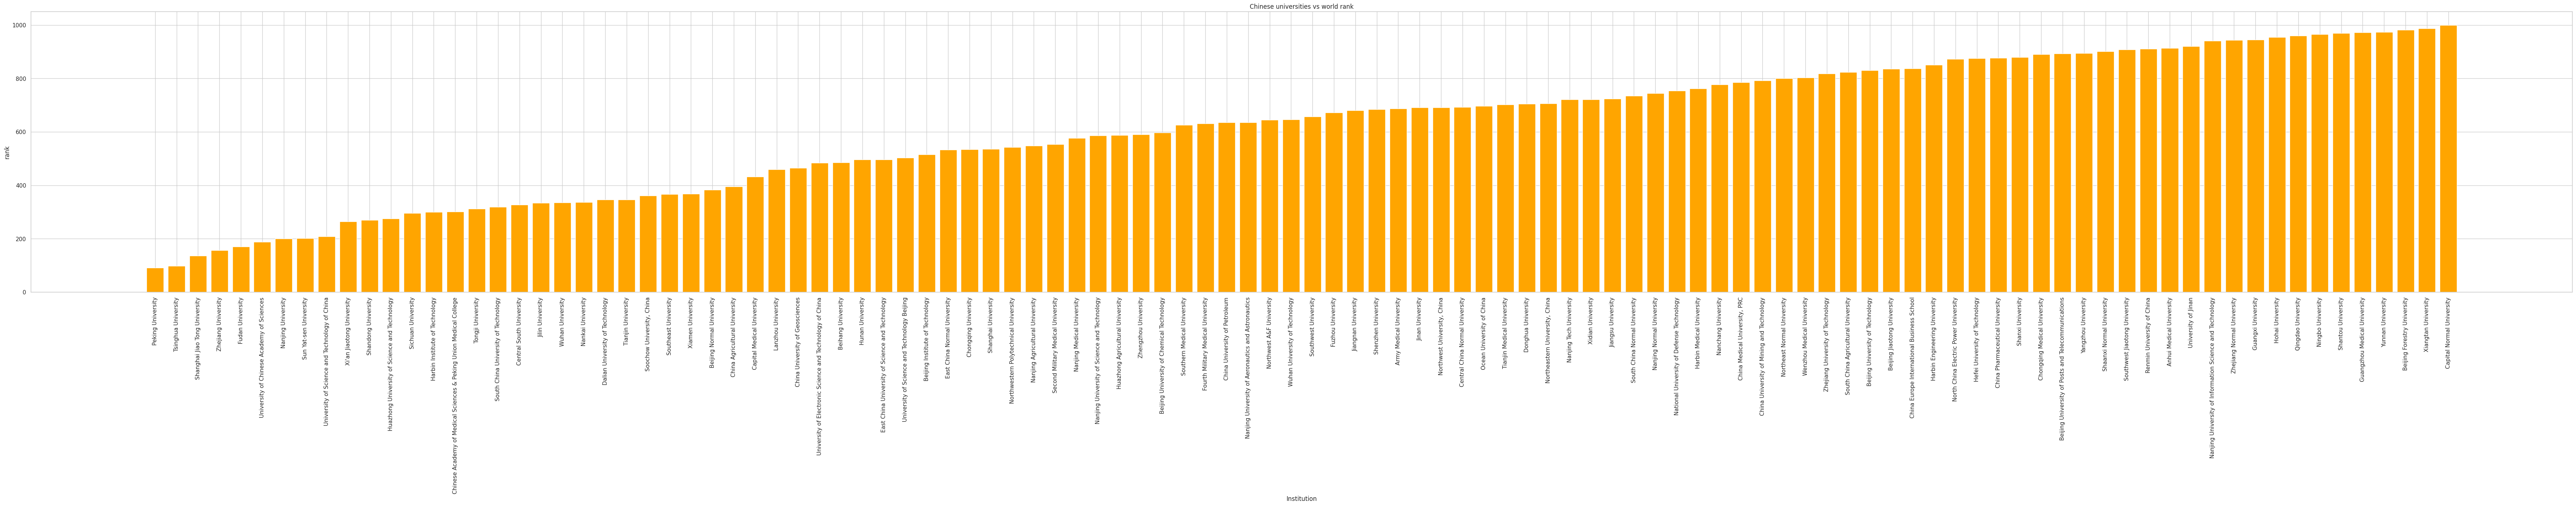

In [33]:
#Chinese universities vs world rank
plt.figure(figsize = ( 90, 10 ))
plt.bar(df_china["Institution"] , df_china["World Rank"] , color = "orange" , )
plt.title('Chinese universities vs world rank')
plt.xlabel("Institution")
plt.xticks(rotation = 90)
plt.ylabel("rank")

In [34]:
import plotly.express as px

# Filter for the top 10 universities in China
df_cn_top10 = df_china.head(10)

# Melt the DataFrame for better plotting
df_melted_cn = df_cn_top10.melt(id_vars='Institution', value_vars=['World Rank', 'National Rank', 'Alumni Employment', 
                                                                   'Research Output', 'Quality Publications', 
                                                                   'Influence', 'Citations', 'Score'], 
                                  var_name='Variable', value_name='Value')

# Create a bar plot
plot_cn = px.bar(df_melted_cn, 
                  x='Institution', 
                  y='Value', 
                  color='Variable', 
                  barmode='group', 
                  text='Value',
                  height=600,
                  title="Top 10 Chinese Universities by Location vs All Variables",
                  color_discrete_sequence=px.colors.qualitative.Set1) 

plot_cn.update_layout(
    title_font=dict(size=20, family="Arial, Bold"),
    xaxis_title="Institution",
    yaxis_title="Values",
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='linear'),  
    template='plotly_white'
)

# Show plot
plot_cn.show()


<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**The bar chart visualizes the top 10 Chinese universities compared against various performance metrics (or variables).**</span> These metrics are likely the columns from your dataframe, including:

- <span style="color:#E74C3C; font-weight:bold;">**World Rank**</span>
- <span style="color:#E74C3C; font-weight:bold;">**National Rank**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Alumni Employment**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Research Output**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Quality Publications**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Influence**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Citations**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Score**</span>

<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Key Observations:**</span>

- <span style="color:#27AE60; font-weight:bold;">**Peking University** and **Tsinghua University** consistently perform well across all variables. However, they do not dominate in every category.</span>

- The <span style="color:#E67E22; font-weight:bold;">**University of Chinese Academy of Sciences**</span> shows an extraordinary peak in <span style="color:#2ECC71; font-weight:bold;">**"Research Output"**</span> (green), significantly outperforming other universities in this area, suggesting it excels in this specific metric but not necessarily across the board.

- <span style="color:#E67E22; font-weight:bold;">**Nanjing University**</span> stands out in terms of <span style="color:#E67E22; font-weight:bold;">**"Citations"**</span> (orange), likely reflecting its strong influence in academic publications.

- <span style="color:#F1C40F; font-weight:bold;">**Variability in Alumni Employment**</span> (yellow): Some universities, such as **Xi'an Jiaotong University**, show very low alumni employment, while others have relatively higher numbers.

- <span style="color:#A0522D; font-weight:bold;">**Quality Publications**</span> (brown) varies less drastically among the top 10, with universities performing comparably in this metric.

- <span style="color:#E74C3C; font-weight:bold;">**The National Rank**</span> (red) generally correlates well with World Rank, although exceptions like the **University of Chinese Academy of Sciences** perform better in specific areas but might not be the best nationally.

<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Potential 


In [35]:
#Iranian universities
df_iran= df2.loc[df2['Location'] == 'Iran']
df_iran

World Rank                                     Institution Location  \
370         371                         Islamic Azad University     Iran   
460         461                            University of Tehran     Iran   
546         547           Tehran University of Medical Sciences     Iran   
591         592                 Sharif University of Technology     Iran   
641         642                Isfahan University of Technology     Iran   
688         689              Amirkabir University of Technology     Iran   
755         756                      Tarbiat Modares University     Iran   
759         760       Iran University of Science and Technology     Iran   
856         857                               Shiraz University     Iran   
871         872                  Ferdowsi University of Mashhad     Iran   
965         966  Shahid Beheshti University of Medical Sciences     Iran   
991         992                      Shahid Beheshti University     Iran   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
370              1               1000               66                   406   
460              2               1000              217                   436   
546              3               1000              283                   739   
591              4               1000              432                   567   
641              5               1000              542                   716   
688              6               1000              396                   659   
755              7               1000              417                   723   
759              8               1000              546                   785   
856              9               1000              604                   894   
871             10               1000              627                   965   
965             11               1000              644                  1000   
991             12               1000              815                  1000   

     Influence Citations  Score  
370       1000       460   75.3  
460       1000      1000   74.2  
546        635       673   73.3  
591       1000       541   72.8  
641       1000       405   72.4  
688       1000       898   72.0  
755       1000      1000   71.4  
759       1000       673   71.4  
856       1000       898   70.7  
871       1000       898   70.6  
965        949      1000   70.0  
991       1000       673   69.8

In [36]:
# Filter for the top 10 universities in Iran
df_ir_top10 = df_iran.head(10)

# Melt the DataFrame for better plotting
df_melted_ir = df_ir_top10.melt(id_vars='Institution', value_vars=['World Rank', 'National Rank', 'Alumni Employment', 
                                                                   'Research Output', 'Quality Publications', 
                                                                   'Influence', 'Citations', 'Score'], 
                                  var_name='Variable', value_name='Value')

# Create a bar plot
plot_ir = px.bar(df_melted_ir, 
                  x='Institution', 
                  y='Value', 
                  color='Variable', 
                  barmode='group', 
                  text='Value',
                  height=600,
                  title="Top 10 Iranian Universities by Location vs All Variables",
                  color_discrete_sequence=px.colors.qualitative.Set1)  
plot_ir.update_layout(
    title_font=dict(size=20, family="Arial, Bold"),
    xaxis_title="Institution",
    yaxis_title="Values",
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='linear'),  
    template='plotly_white'
)

# Show plot
plot_ir.show()


<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Analysis of the Top 10 Iranian Universities Based on Various Performance Metrics**</span>

This bar chart compares the top 10 Iranian universities across several performance indicators (metrics), which include:

- <span style="color:#E74C3C; font-weight:bold;">**World Rank**</span>
- <span style="color:#E74C3C; font-weight:bold;">**National Rank**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Alumni Employment**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Research Output**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Quality Publications**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Influence**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Citations**</span>
- <span style="color:#E74C3C; font-weight:bold;">**Overall Score**</span>

<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Key Observations:**</span>

- <span style="color:#27AE60; font-weight:bold;">**Islamic Azad University**</span> stands out significantly in the <span style="color:#2ECC71; font-weight:bold;">**"Research Output"**</span> (green) metric, outperforming other universities. However, it ranks lower in overall metrics such as <span style="color:#3498DB; font-weight:bold;">**World Rank**</span> (blue) and <span style="color:#E74C3C; font-weight:bold;">**National Rank**</span> (red).

- <span style="color:#E67E22; font-weight:bold;">**University of Tehran**</span> displays a strong and balanced performance across most indicators, particularly excelling in <span style="color:#FFC107; font-weight:bold;">**"Influence"**</span> (pink) and <span style="color:#F39C12; font-weight:bold;">**"Citations"**</span> (orange).

- <span style="color:#2980B9; font-weight:bold;">**Sharif University of Technology**</span> also performs well in <span style="color:#2ECC71; font-weight:bold;">**"Research Output"**</span> and <span style="color:#F1C40F; font-weight:bold;">**"Alumni Employment"**</span> (yellow), indicating a strong emphasis on scientific production and job placements.

- <span style="color:#8E44AD; font-weight:bold;">**Amirkabir University of Technology**</span> and <span style="color:#8E44AD; font-weight:bold;">**Iran University of Science and Technology**</span> exhibit similarly strong performances in <span style="color:#2ECC71; font-weight:bold;">**"Research Output"**</span>.

- <span style="color:#C0392B; font-weight:bold;">**Tehran University of Medical Sciences**</span> showcases high <span style="color:#F1C40F; font-weight:bold;">**"Alumni Employment"**</span> (yellow), reflecting the successful job placement of its graduates.

- Many universities show comparable levels of <span style="color:#A0522D; font-weight:bold;">**"Quality Publications"**</span> (brown), but disparities are more evident in <span style="color:#F39C12; font-weight:bold;">**"Citations"**</span> and <span style="color:#FFC107; font-weight:bold;">**"Influence"**</span>.

<span style="color:#3498DB; font-size:1.5em; font-weight:bold;


Text(0, 0.5, 'rank')

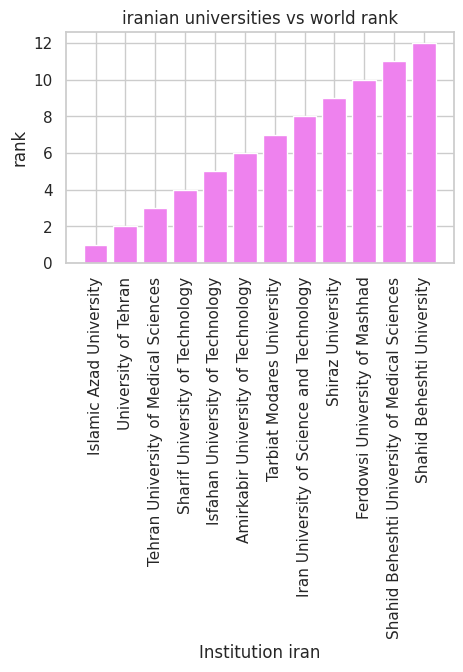

In [37]:
#iranian universities vs world rank
plt.figure(figsize = ( 5, 3))
plt.bar(df_iran["Institution"] , df_iran["National Rank"] , color = "violet")
plt.title('iranian universities vs world rank')
plt.xlabel("Institution iran")
plt.xticks(rotation = 90)
plt.ylabel("rank")

In [38]:
#merge 3 columns
merge_usa_china_iran = pd.concat([df_us , df_china , df_iran], ignore_index = True)
merge_usa_china_iran

World Rank                                     Institution Location  \
0             1                              Harvard University      USA   
1             2                             Stanford University      USA   
2             3           Massachusetts Institute of Technology      USA   
3             6              University of California, Berkeley      USA   
4             7                            Princeton University      USA   
..          ...                                             ...      ...   
328         760       Iran University of Science and Technology     Iran   
329         857                               Shiraz University     Iran   
330         872                  Ferdowsi University of Mashhad     Iran   
331         966  Shahid Beheshti University of Medical Sciences     Iran   
332         992                      Shahid Beheshti University     Iran   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
3                4                 52               18                    12   
4                5                 15              146                    99   
..             ...                ...              ...                   ...   
328              8               1000              546                   785   
329              9               1000              604                   894   
330             10               1000              627                   965   
331             11               1000              644                  1000   
332             12               1000              815                  1000   

     Influence Citations  Score  
0            1         1  100.0  
1            3         2   96.7  
2            2         6   95.1  
3            4         8   92.5  
4           28        27   91.9  
..         ...       ...    ...  
328       1000       673   71.4  
329       1000       898   70.7  
330       1000       898   70.6  
331        949      1000   70.0  
332       1000       673   69.8  

[333 rows x 10 columns]

In [39]:
plt.figure(figsize=(20,10))
column = [ 'Alumni Employment','Research Output', 'Quality Publications','Influence']
plot_3_country = px.histogram(merge_usa_china_iran, x="Location", y=column,
                   barmode='group', text_auto='.1s',height=600 )
plot_3_country.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

<Figure size 2000x1000 with 0 Axes>

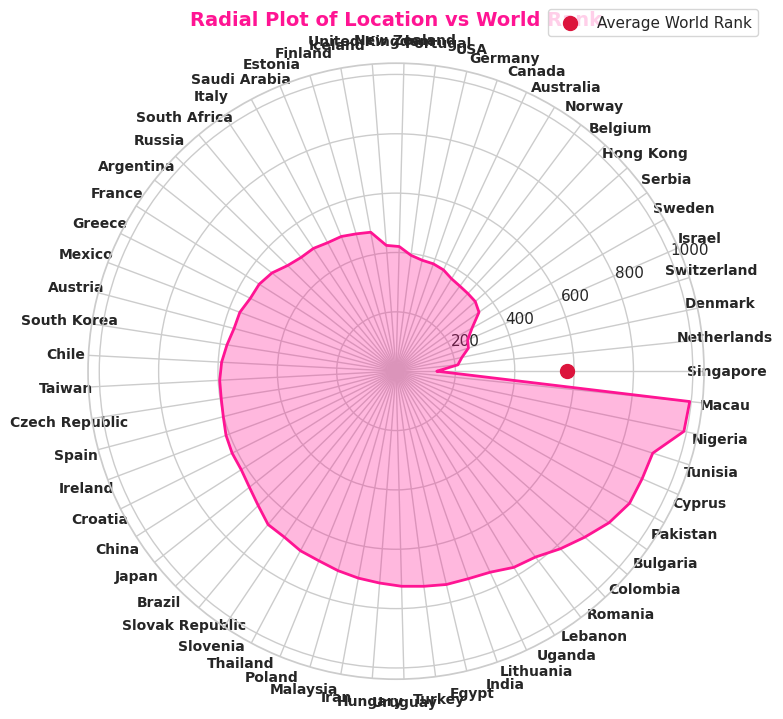

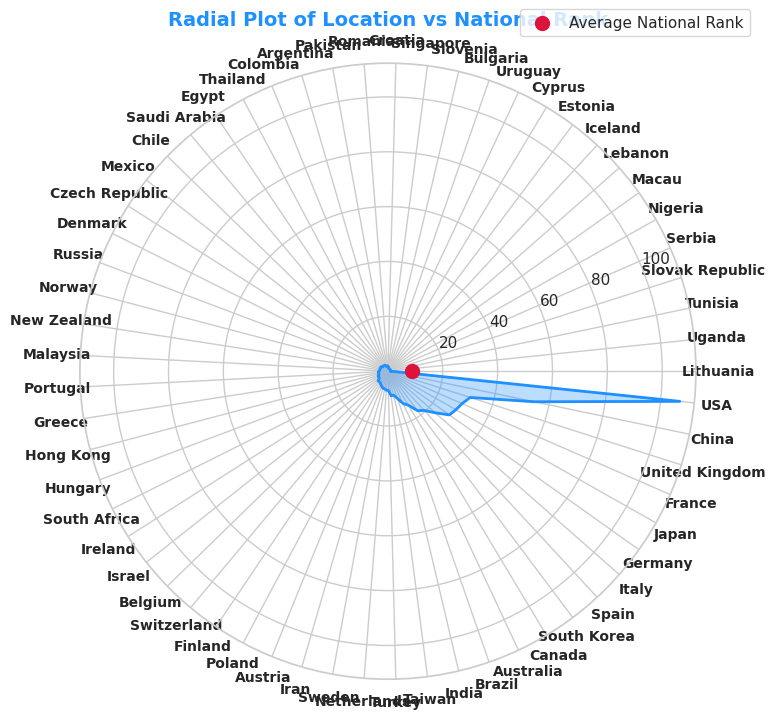

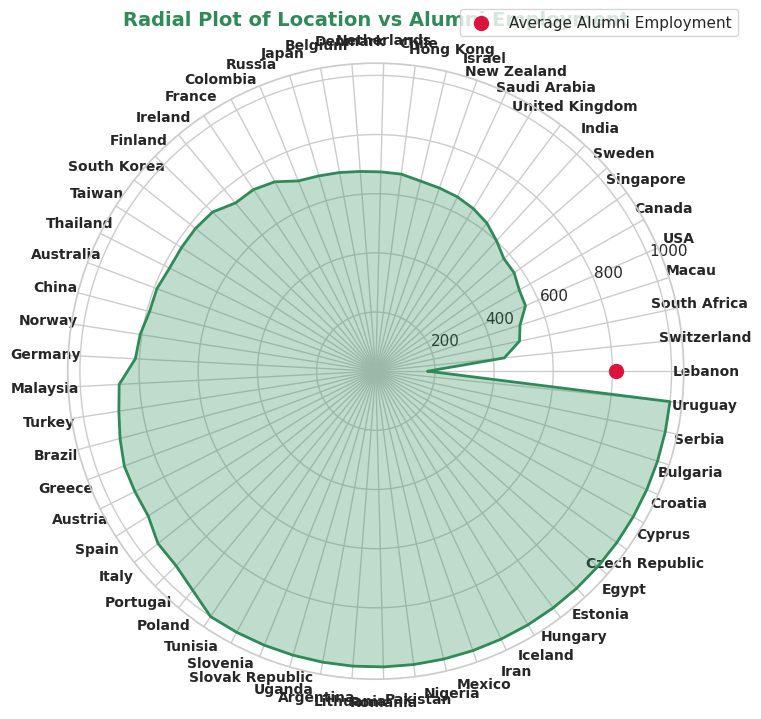

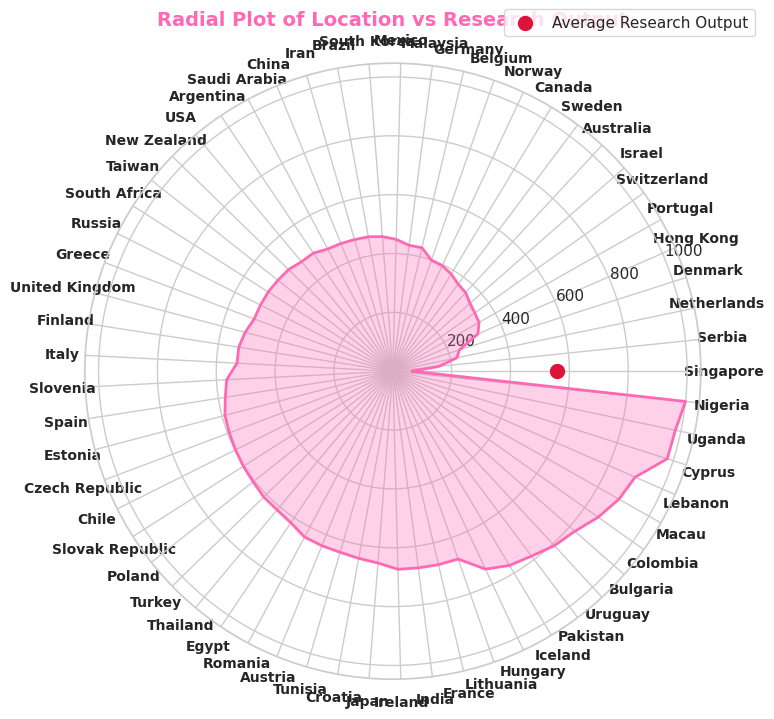

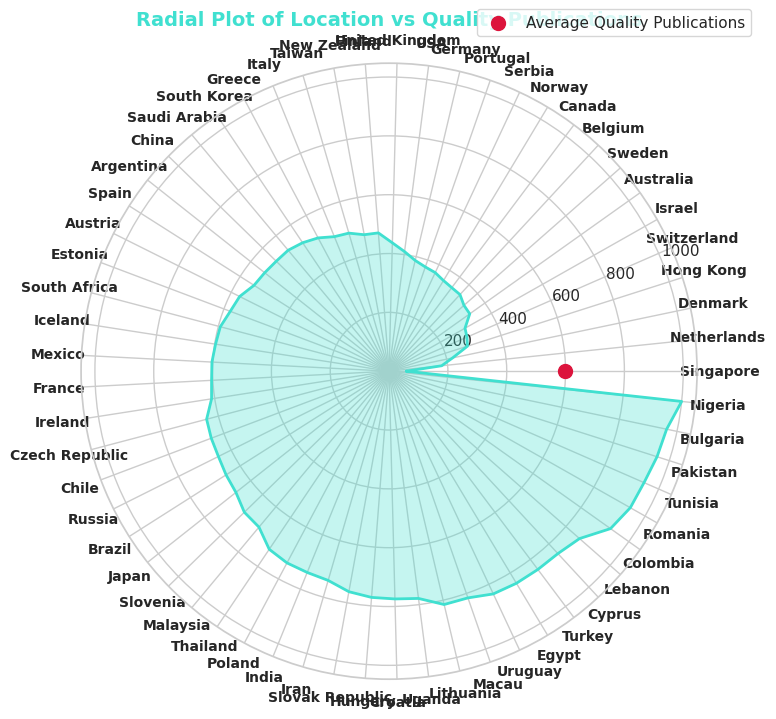

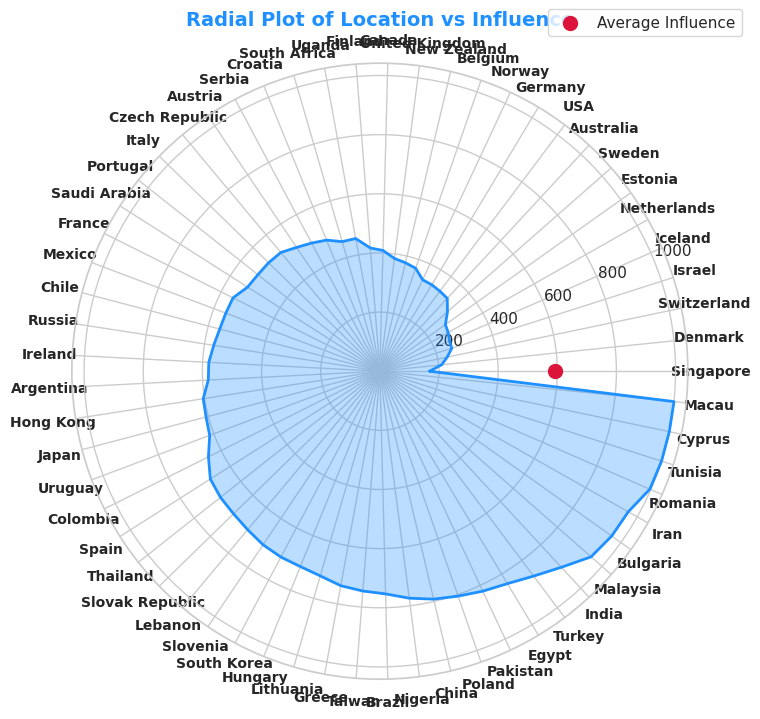

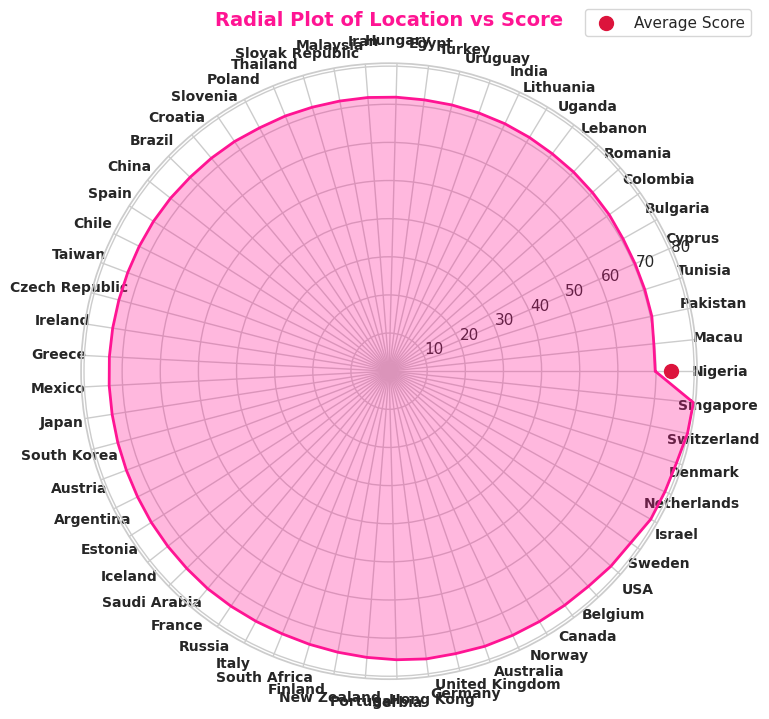

In [40]:
import random

# Columns to plot
columns = df2.select_dtypes(include='number').columns

# Define a list of new colors 
colors = ['#FF7F50', '#6495ED', '#2E8B57', '#FFD700', '#FF1493', '#BA55D3', '#40E0D0', '#FF8C00', '#7FFF00', '#FF69B4', '#1E90FF', '#DAA520', '#32CD32']

for col in columns:
    
    sorted_data = df2.groupby('Location')[col].mean().sort_values()
    
    num_vars = len(sorted_data)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    values = sorted_data.values.tolist()
    values += values[:1]
    angles += angles[:1]

    color = random.choice(colors)
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color=color, alpha=0.3)  
    ax.plot(angles, values, color=color, linewidth=2)

    # Add country means (average) as points
    avg_value = sorted_data.mean()  
    ax.scatter(0, avg_value, color='#DC143C', zorder=5, s=100, label=f'Average {col}') 
    
    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(sorted_data.index, fontsize=10, fontweight='bold')

    # Customize the title
    plt.title(f'Radial Plot of Location vs {col}', fontsize=14, fontweight='bold', color=color)

    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.show()


<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Radial Bar Plot Analysis of University Performance**</span>

This code generates a **Radial Bar Plot** for each numerical column in the dataframe, displaying a circular plot for the average value of each numerical variable across different locations.

The plot visually illustrates how various metrics are distributed across geographic locations, making it useful for comparing the performance or influence of universities in different regions.

<span style="color:#E67E22; font-weight:bold;">**Key Observations:**</span>

- For variables like <span style="color:#2980B9; font-weight:bold;">**World Rank**</span> and <span style="color:#E74C3C; font-weight:bold;">**National Rank**</span>, a larger area indicates a worse rank (as lower ranks are better).
  
- For variables like <span style="color:#27AE60; font-weight:bold;">**Citations**</span>, <span style="color:#2ECC71; font-weight:bold;">**Research Output**</span>, and <span style="color:#FFC107; font-weight:bold;">**Influence**</span>, a larger area represents better performance.

This visual method allows for a clear comparison of how universities perform across various geographical areas based on different metrics.

<span style="color:#3498DB; font-weight:bold;">**Performance Insights:**</span>

- An increase in the numbers for the <span style="color:#FFC107; font-weight:bold;">**"Alumni Employment,"**</span> <span style="color:#2ECC71; font-weight:bold;">**"Research Output,"**</span> <span style="color:#A0522D; font-weight:bold;">**"Quality Publications,"**</span> <span style="color:#27AE60; font-weight:bold;">**"Influence,"**</span> <span style="color:#F39C12; font-weight:bold;">**"Citations,"**</span> and <span style="color:#E74C3C; font-weight:bold;">**"Score"**</span> columns signifies higher quality and credibility of the university.

This approach enhances the understanding of university performance across different regions, highlighting strengths and areas for improvement.


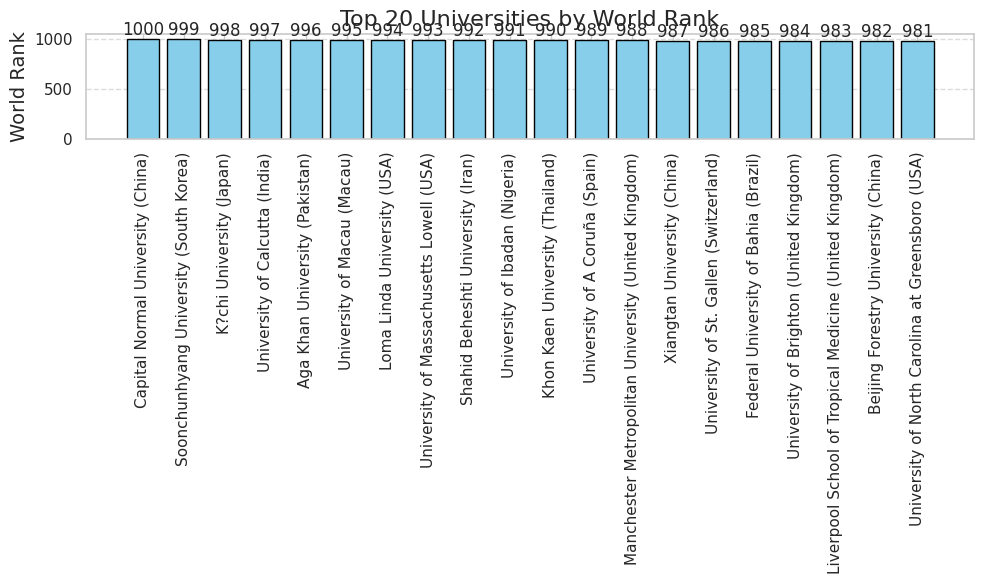

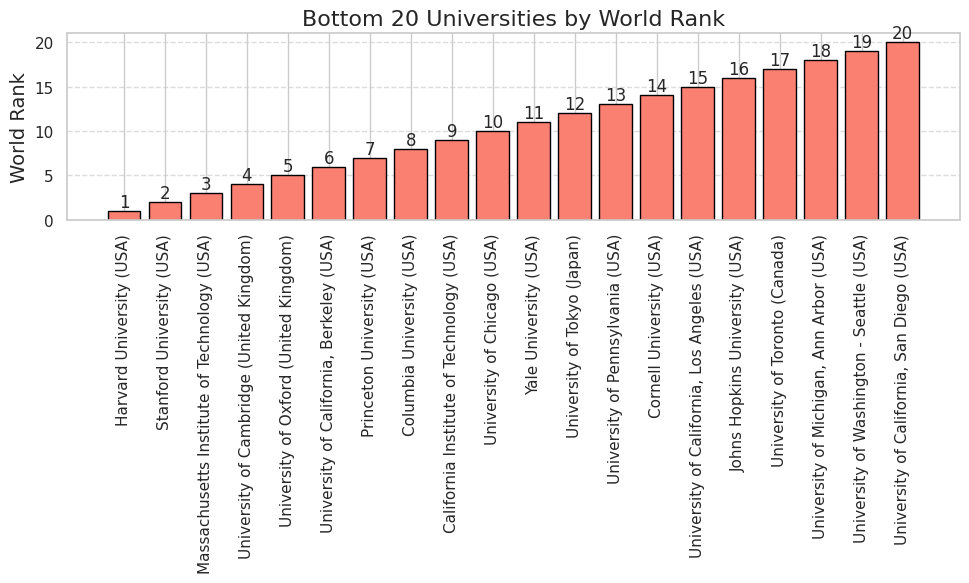

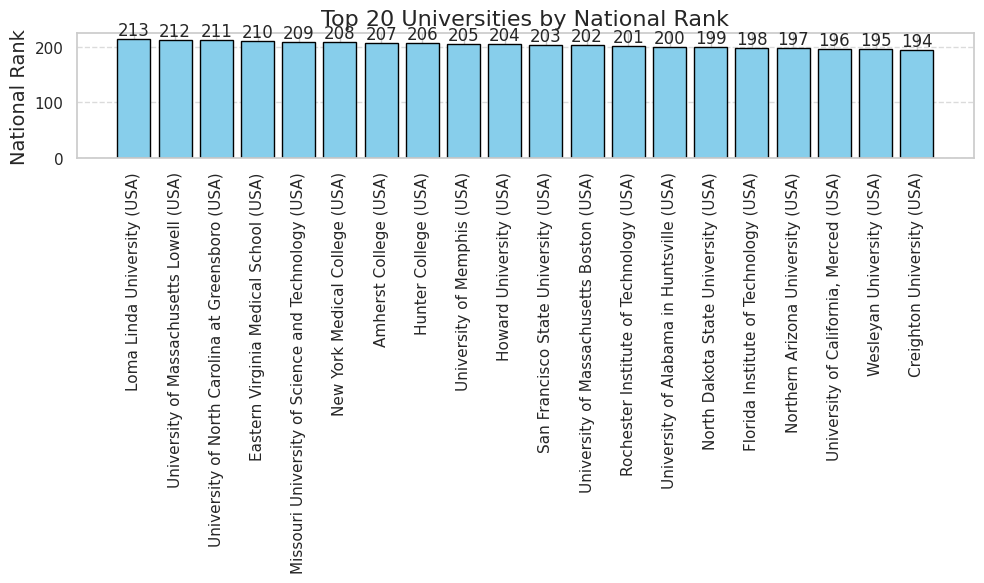

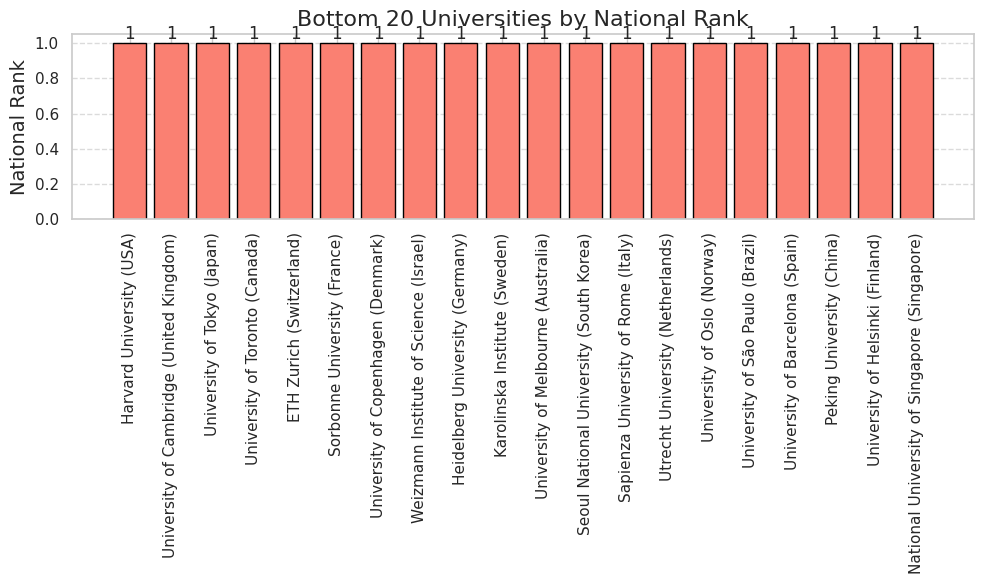

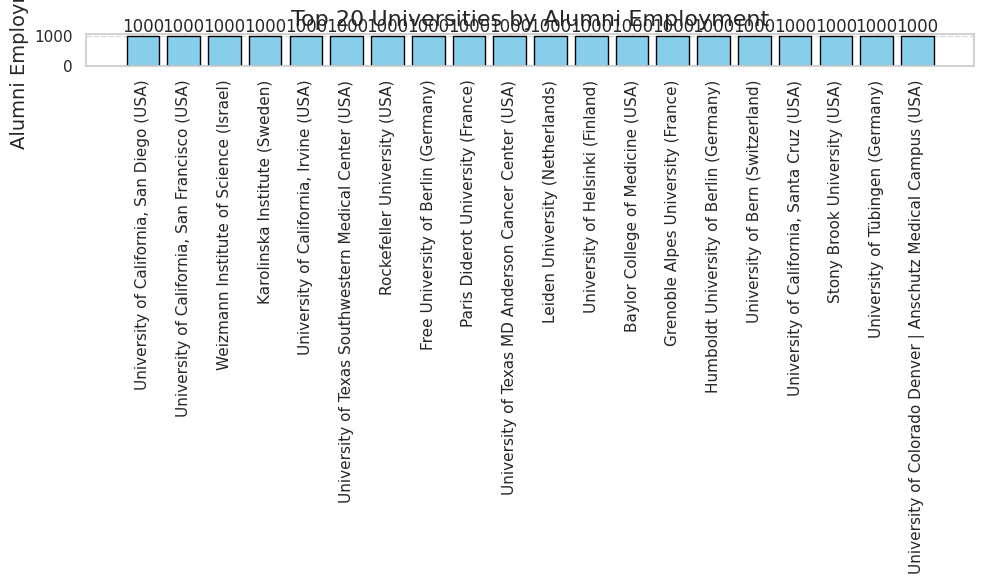

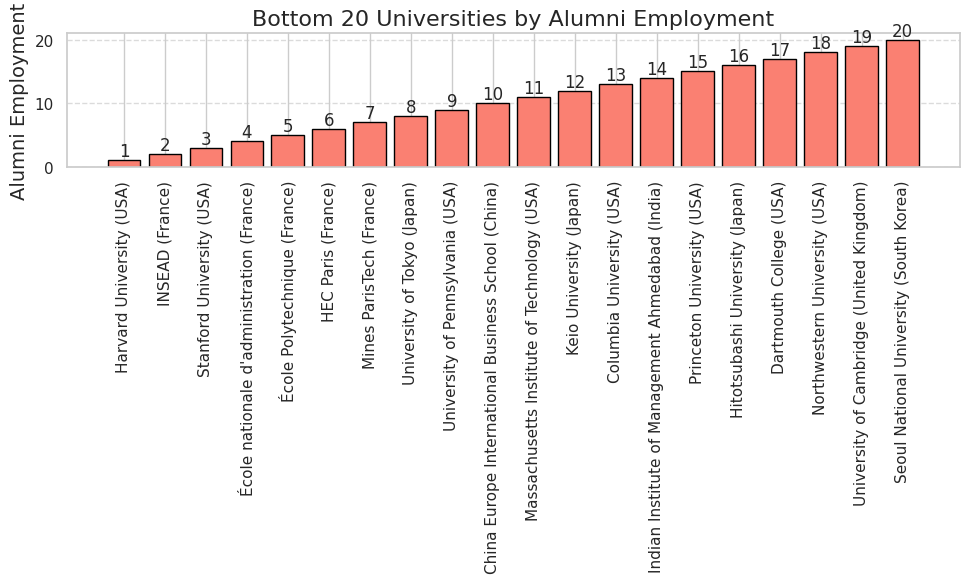

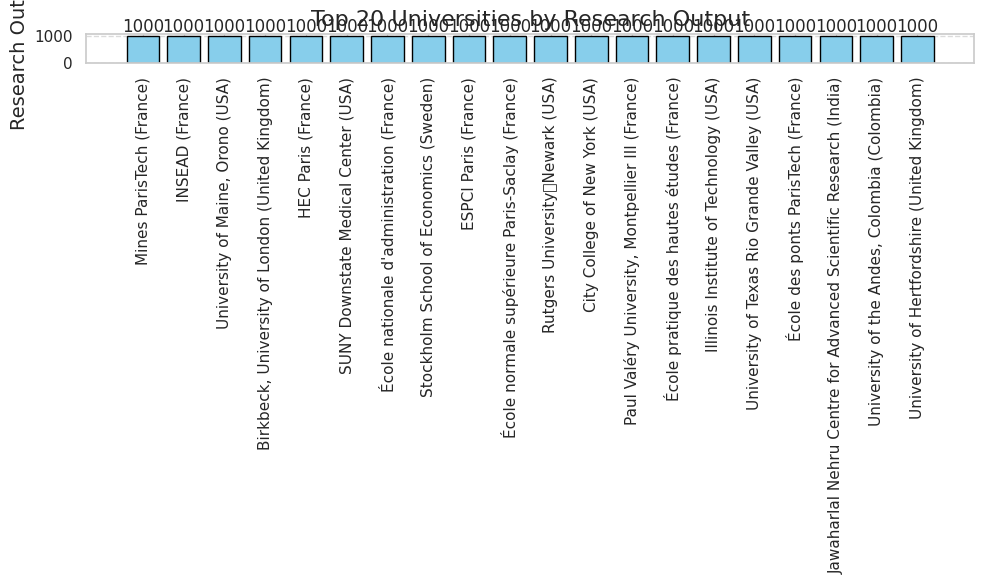

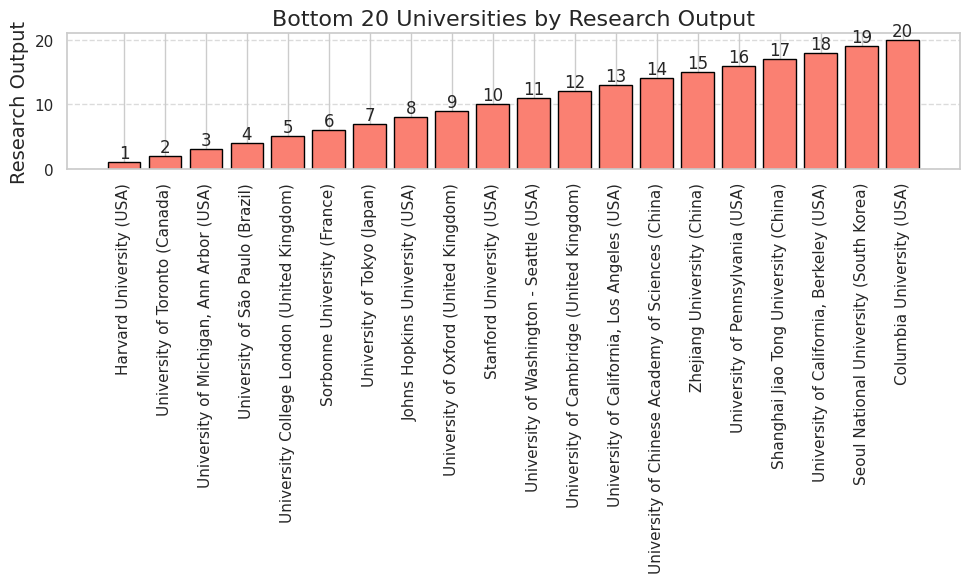

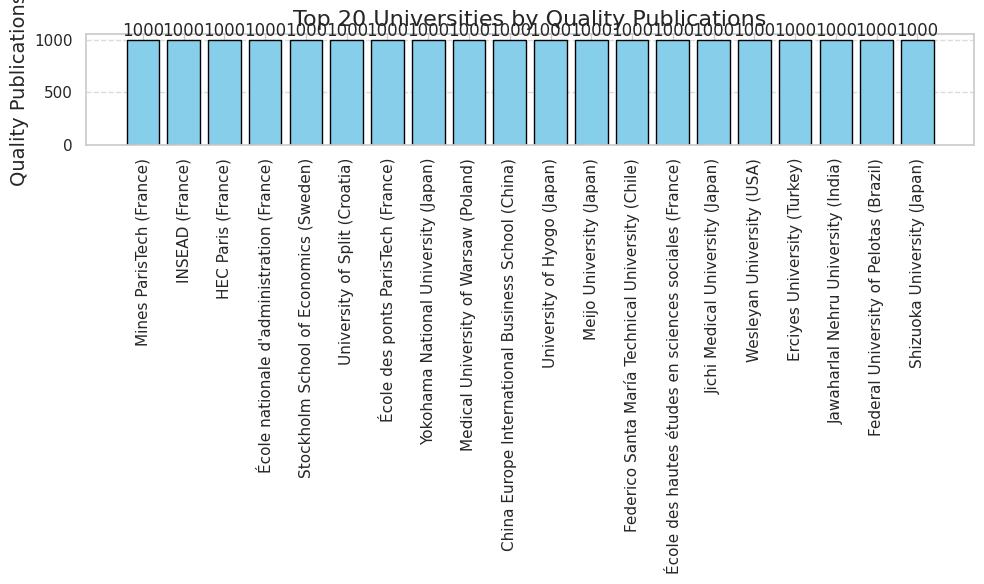

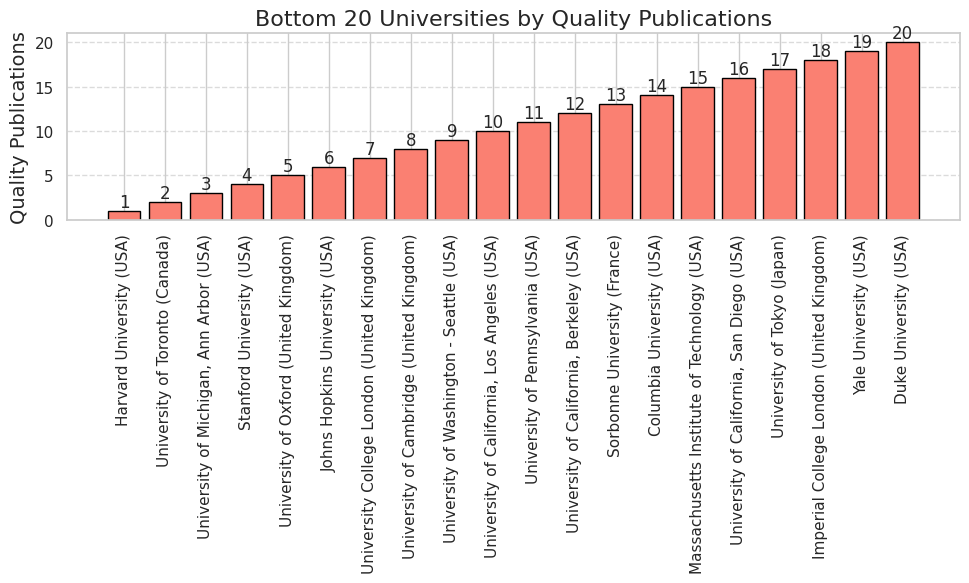

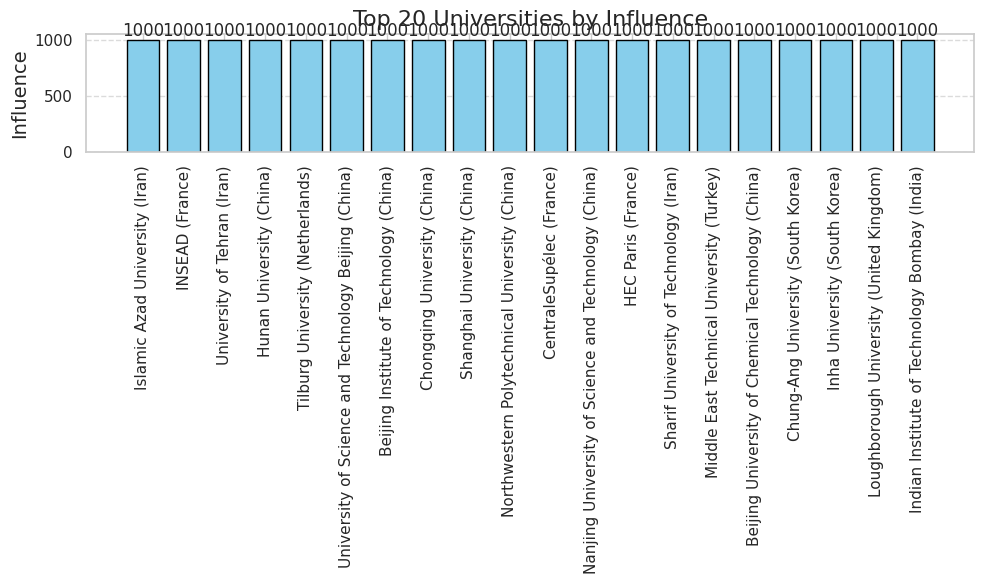

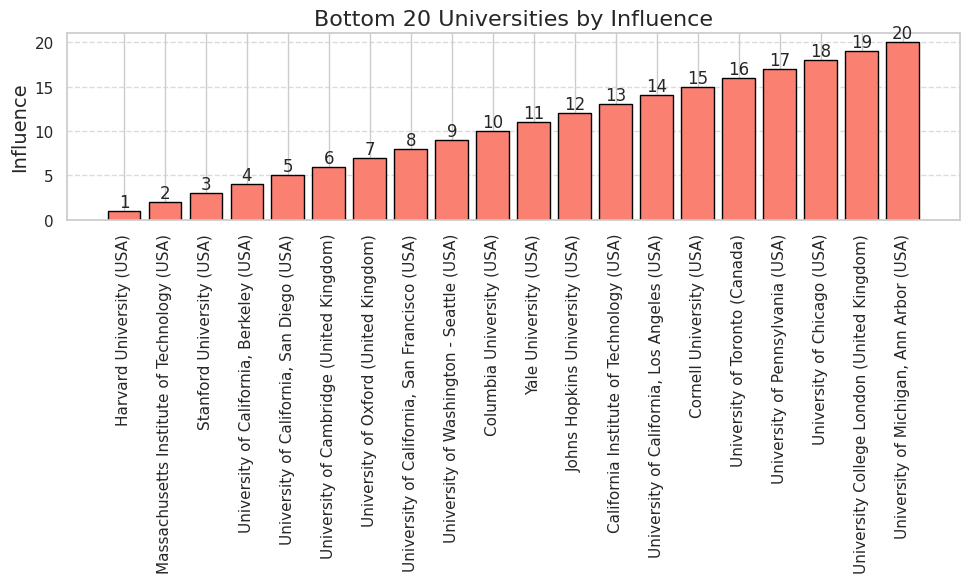

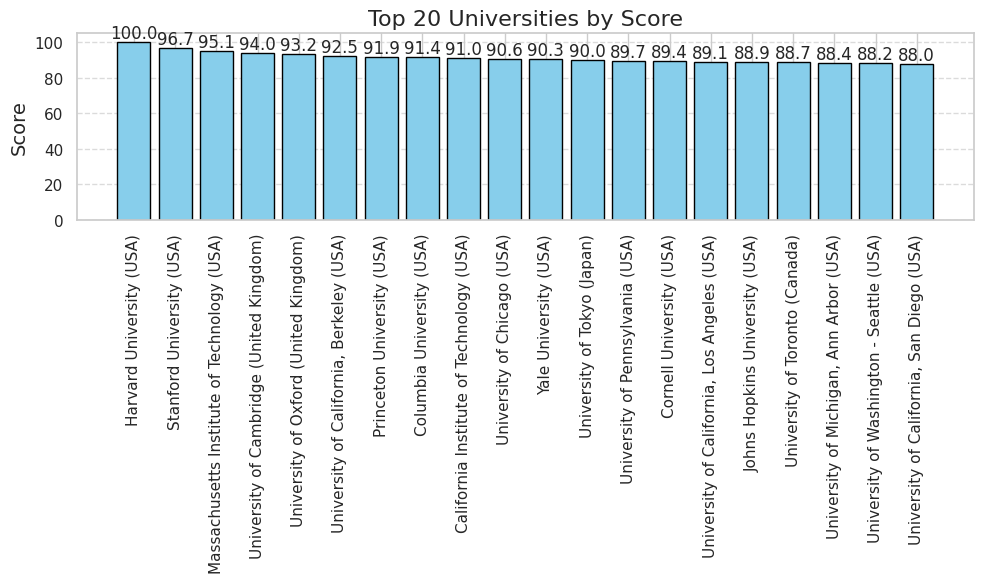

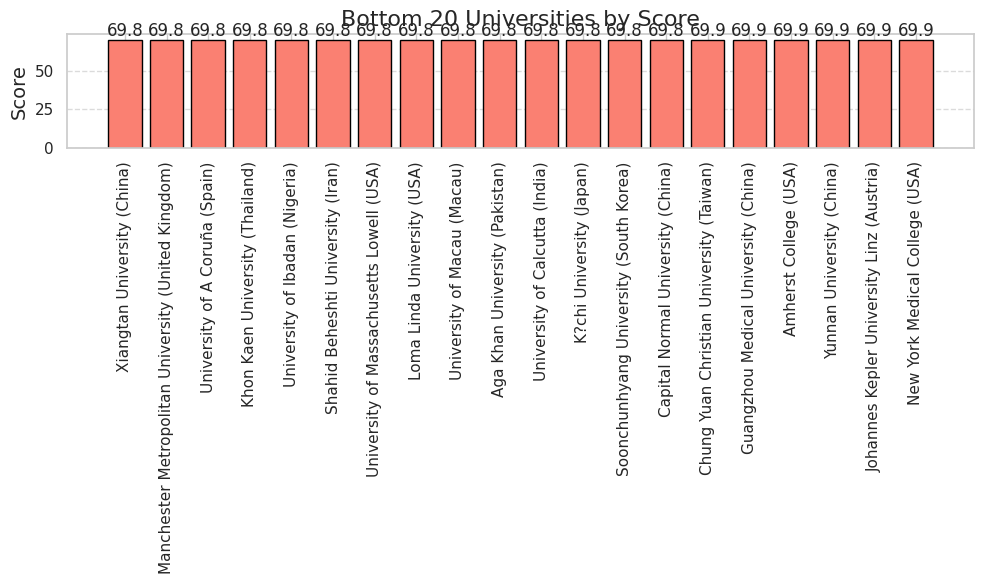

In [41]:
numeric_columns = df2.select_dtypes(include='number').columns

for column in numeric_columns:
    
    top_20 = df2.nlargest(20, column)[['Institution', 'Location', column]]
    top_20['Label'] = top_20['Institution'] + ' (' + top_20['Location'] + ')'
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_20['Label'], top_20[column], color='skyblue', edgecolor='black')
    plt.ylabel(column, fontsize=14)
    plt.title(f'Top 20 Universities by {column}', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
    bottom_20 = df2.nsmallest(20, column)[['Institution', 'Location', column]]
    bottom_20['Label'] = bottom_20['Institution'] + ' (' + bottom_20['Location'] + ')'
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(bottom_20['Label'], bottom_20[column], color='salmon', edgecolor='black')
    plt.ylabel(column, fontsize=14)
    plt.title(f'Bottom 20 Universities by {column}', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


<span style="color:#3498DB; font-size:1.5em; font-weight:bold;">**Analysis of the Code**</span>

The provided code generates **horizontal bar plots** to visualize the top 20 and bottom 20 universities based on various numerical metrics from the **df2 DataFrame**. The following is a detailed analysis:

<span style="color:#E67E22; font-weight:bold;">**Data Selection:**</span>
- The code first selects numeric columns from the DataFrame, ensuring that only relevant data is processed for visualization.

<span style="color:#27AE60; font-weight:bold;">**Top 20 Universities:**</span>
- For each numeric metric, it identifies the **top 20 universities** with the highest values.
- The institution names are combined with their respective locations to create labels for the bars.
- Each bar is colored in **sky blue**, with edge lines for better visibility.
- Values are displayed above each bar for clarity, making it easy to read the exact figures.

<span style="color:#C0392B; font-weight:bold;">**Bottom 20 Universities:**</span>
- Similarly, the **bottom 20 universities** with the lowest values are identified.
- The labels are created in the same way as for the top 20.
- Bars are colored in **salmon**, again with edge lines for distinction.
- Values are also displayed above these bars.

<span style="color:#E67E22; font-weight:bold;">**For Example:**</span>
- As observed, the best (lowest) **world rank** is for **Harvard University** in the United States, while the lowest world rank is for **Capital Normal University** in China.
- The best (lowest) **national rank** is also for Harvard University, while the lowest national rank is for **Loma Linda University**, also in the United States.

<span style="color:#3498DB; font-weight:bold;">**Overall Insights:**</span>
- **Performance Comparison:** The code allows for easy comparison of university performance across different metrics, which is crucial for stakeholders looking to assess educational quality.
- **Decision-Making Tool:** It can serve as a decision-making tool for prospective students, educators, and policymakers by highlighting which institutions excel in specific areas and which ones may need improvement.
- **Visibility of Results:** Displaying values above bars enhances the readability and comprehension of results, making it easier to convey findings to an audience.


In [42]:
import pandas as pd
import plotly.express as px

# Assuming df2 is already defined in your workspace
df_sunburst = df2.copy()

continent_dict = {
    'Iran': 'Asia',
    'China': 'Asia',
    'USA': 'North America',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'Japan': 'Asia',
    'Canada': 'North America',
    'Australia': 'Australia',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'India': 'Asia',
    'Pakistan': 'Asia',
    'Russia': 'Europe',
    'Mexico': 'North America',
    'Argentina': 'South America',
    'South Korea': 'Asia',
    'Egypt': 'Africa',
}

df_sunburst['Continent'] = df_sunburst['Location'].map(continent_dict)

nan_rows = df_sunburst[df_sunburst['Continent'].isnull()]
print("Missing values in the column: Continent:")
print(nan_rows)

df_sunburst = df_sunburst.dropna(subset=['Continent'])

# Define a custom color sequence (you can choose any colors you like)
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4']

fig = px.sunburst(
    df_sunburst,
    path=['Continent', 'Location', 'Institution'],  
    color='Continent',    
    color_discrete_sequence=custom_colors  # Use the custom color sequence here
)

fig.update_traces(textinfo="label+percent parent")   

fig.update_layout(
    title_text="Distribution of Universities by Continent and Location", 
    titlefont={'size': 15, 'family': 'Serif'},
    width=750,  
    height=750,  
    margin=dict(l=0, r=0, t=40, b=0)  
)

fig.show()


Missing values in the column: Continent:
     World Rank                    Institution     Location  National Rank  \
27           28                     ETH Zurich  Switzerland              1   
28           29            Sorbonne University       France              1   
38           39       University of Copenhagen      Denmark              1   
44           45  Weizmann Institute of Science       Israel              1   
48           49           Karolinska Institute       Sweden              1   
..          ...                            ...          ...            ...   
985         986       University of St. Gallen  Switzerland              9   
988         989         University of A Coruña        Spain             38   
989         990           Khon Kaen University     Thailand              4   
990         991           University of Ibadan      Nigeria              1   
994         995            University of Macau        Macau              1   

     Alumni Employment

<span style="color:#2E86C1; font-size:1.6em; font-weight:bold;">🌍 **Distribution of Universities by Continent and Country**</span>

<span style="color:#2980B9; font-size:1.4em; font-weight:bold;">**Continents:**</span>

- **🗺️ North America:** 
  - **37%** of all universities are located in this continent, with a significant portion in the **United States (USA)**.

- **🌏 Asia:** 
  - Approximately **35%** of universities are found in Asia, with countries like **China, Japan, South Korea,** and **Iran** accounting for a large share.

- **🇪🇺 Europe:** 
  - **18%** of universities are in Europe, with the **United Kingdom** and **Germany** holding the largest percentages.

- **🌍 Africa and South America:** 
  - A very small percentage of universities are located in these continents.

<span style="color:#D35400; font-size:1.4em; font-weight:bold;">**Countries:**</span>

- **🇺🇸 United States (USA):** 
  - The highest number of universities are in this country, comprising **87%** of all universities in North America, indicating the strong educational power of the USA.

- **🇨🇳 China:** 
  - **47%** of Asia's universities are located in China, highlighting the high concentration of prestigious institutions in this country.

- **🇩🇪 Germany and 🇬🇧 United Kingdom:** 
  - These two countries have the most universities in Europe, accounting for **45%** and **51%**, respectively.

- **🌐 Other Countries:** 
  - Countries like **Canada** (11% of North America), **Brazil** (87% of South America), and **Australia** (100% of Australian universities) also have significant shares.

<span style="color:#2E86C1; font-size:1.4em; font-weight:bold;">**Key Insights:**</span>

- The chart shows that the distribution of universities is highly concentrated in certain regions, particularly in the **USA** and **China**.

- In continents like **South America** and **Africa**, the number of universities is notably lower, which may be related to economic, demographic, and educational development factors.

<span style="color:#2E86C1; font-size:1.4em; font-weight:bold;">**Overall Conclusion:**</span>

The chart illustrates how universities are distributed across different continents and countries. The **United States** and **China** stand out as the two countries with the highest number of universities globally, while the presence of universities in continents like **South America** and **Africa** is significantly lower.


In [43]:
plot2= px.scatter(df2, x='World Rank', y='Influence', color='Score',
                  title='World Rank & Influence differentiated by score')
plot2.show()

In [44]:
plot3= px.scatter(df2, x='Research Output', y='Score', color='World Rank',
                   title='Research Output & score differentiated by world rank')
plot3.show()

In [45]:
plot4= px.scatter(df2, x='Research Output', y='World Rank', color='Location'
                 ,title='Research Output & world rank differentiated by Location')
plot4.show()
plt.figure(figsize = ( 7, 5 ))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

In [46]:
#find unique location
unique_locations = df2['Location'].unique()
number_of_unique_locations = len(unique_locations)
print(number_of_unique_locations)

61


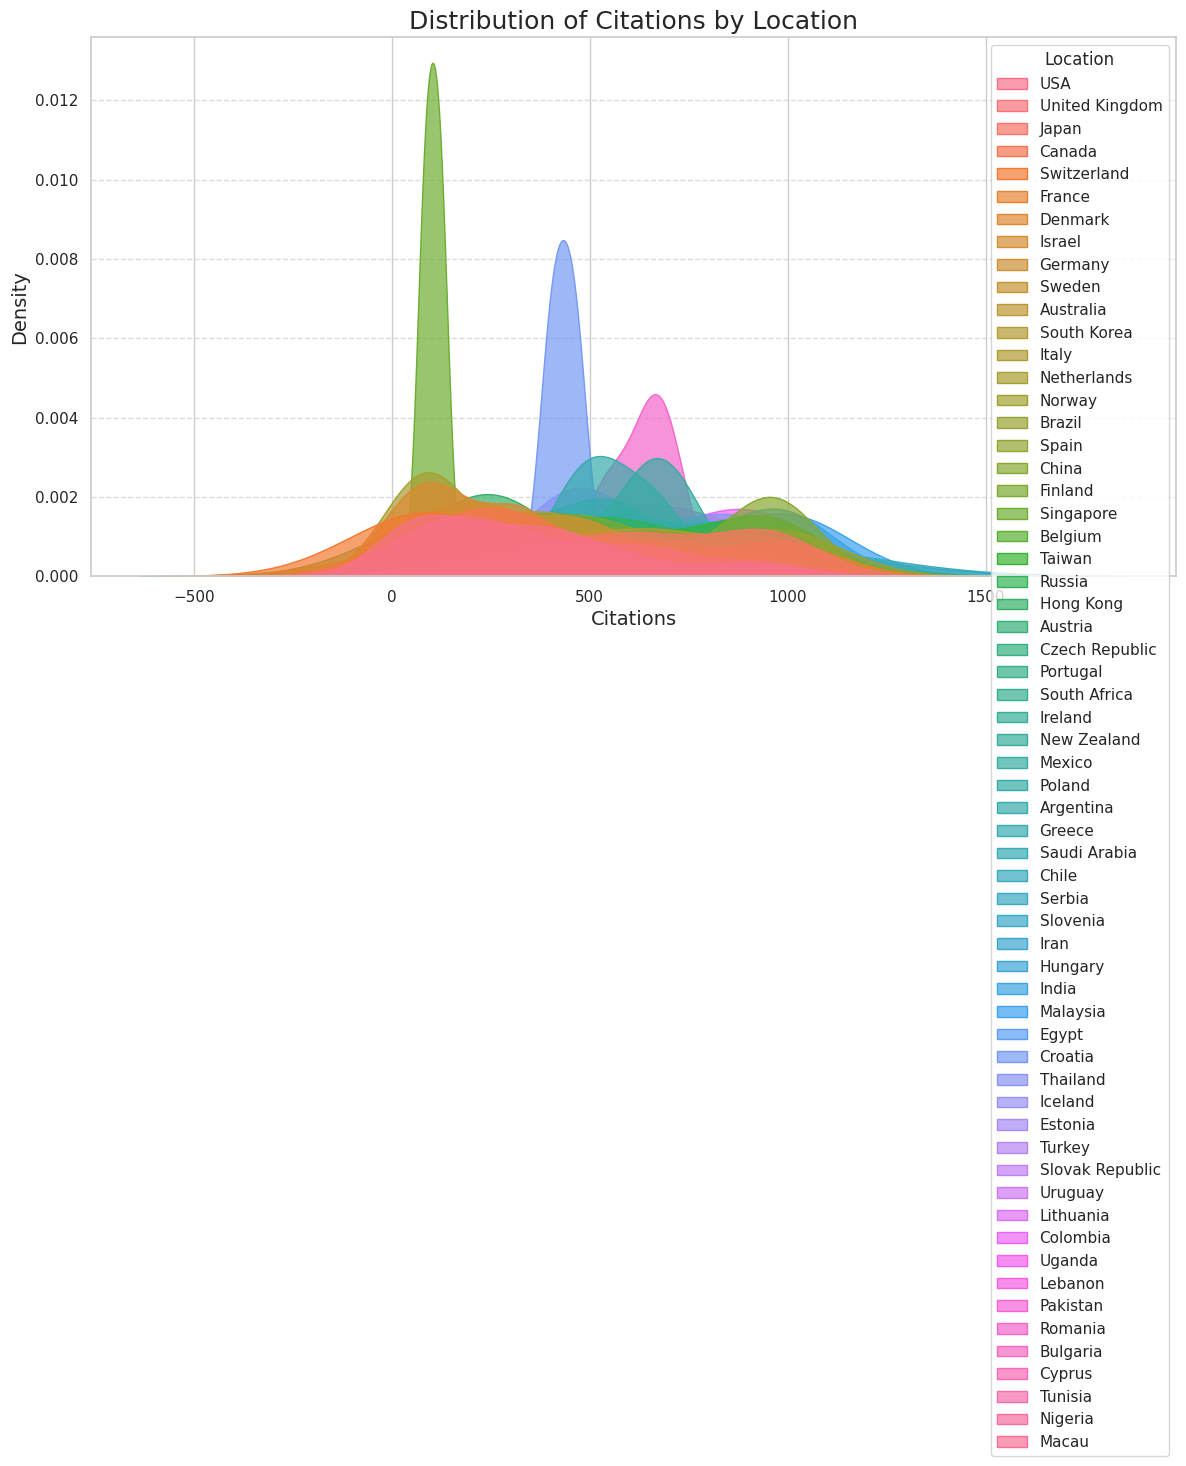

In [47]:
column = 'Citations'  
df2[column] = pd.to_numeric(df2[column], errors='coerce')  
df2[column] = df2[column].fillna(0)   

plt.figure(figsize=(14, 7))

palette = sns.color_palette("husl", len(df2['Location'].unique()))  

sns.kdeplot(data=df2, x=column, hue='Location', fill=True, palette=palette, common_norm=False, alpha=0.7)

plt.title(f'Distribution of {column} by Location', fontsize=18)
plt.xlabel(column, fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()

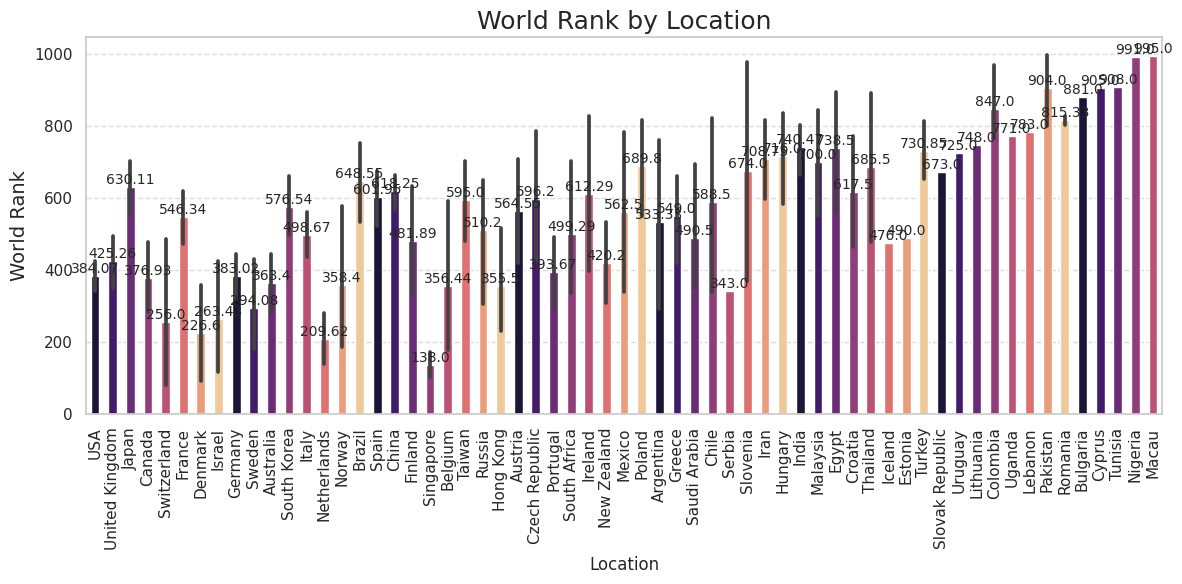

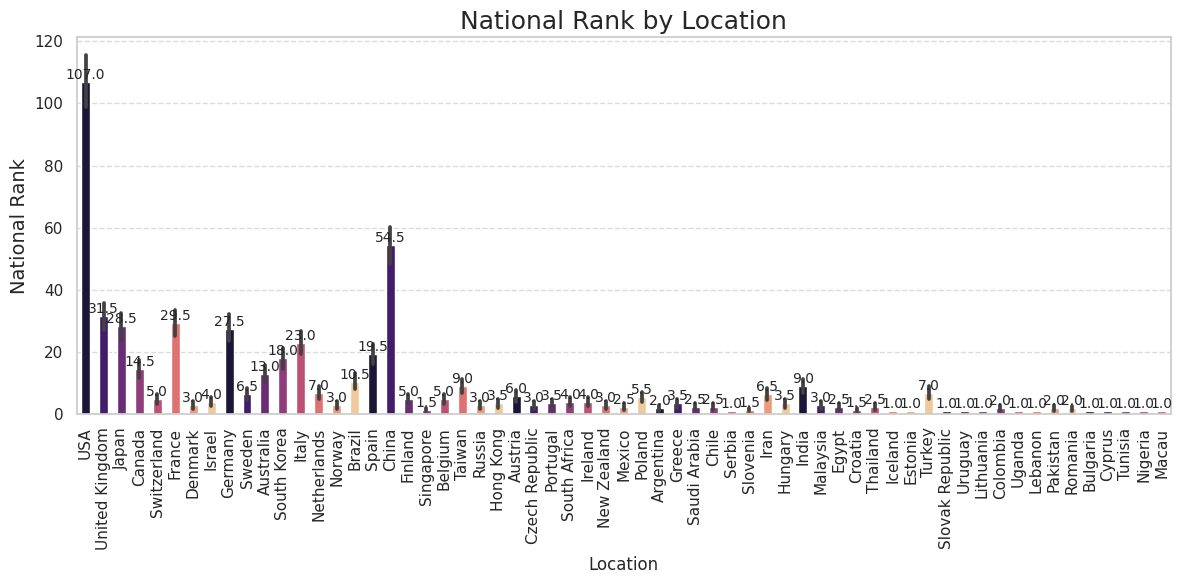

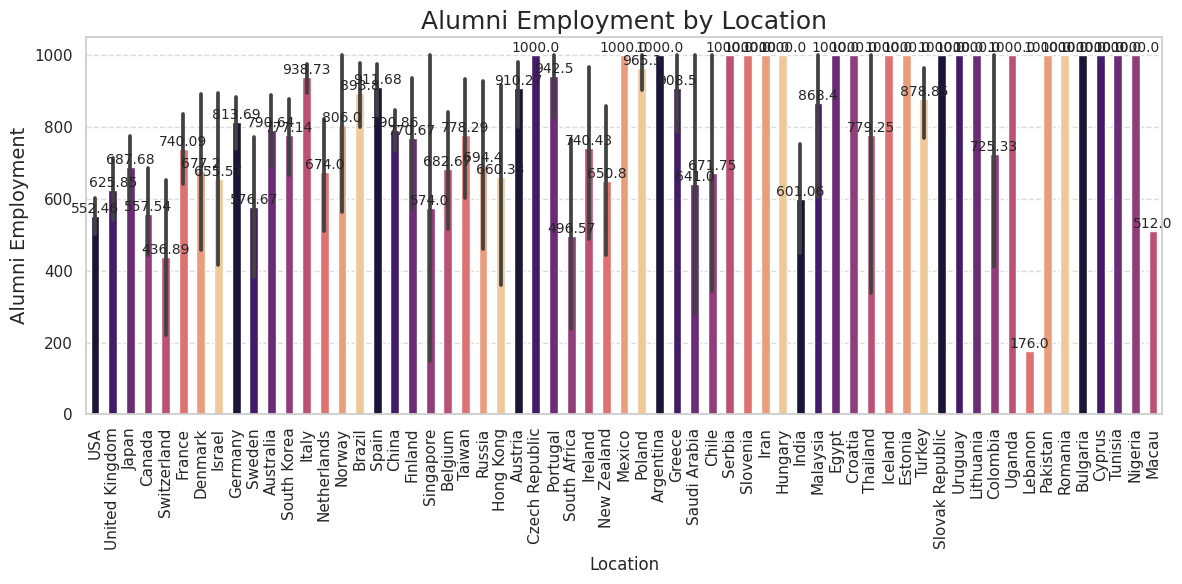

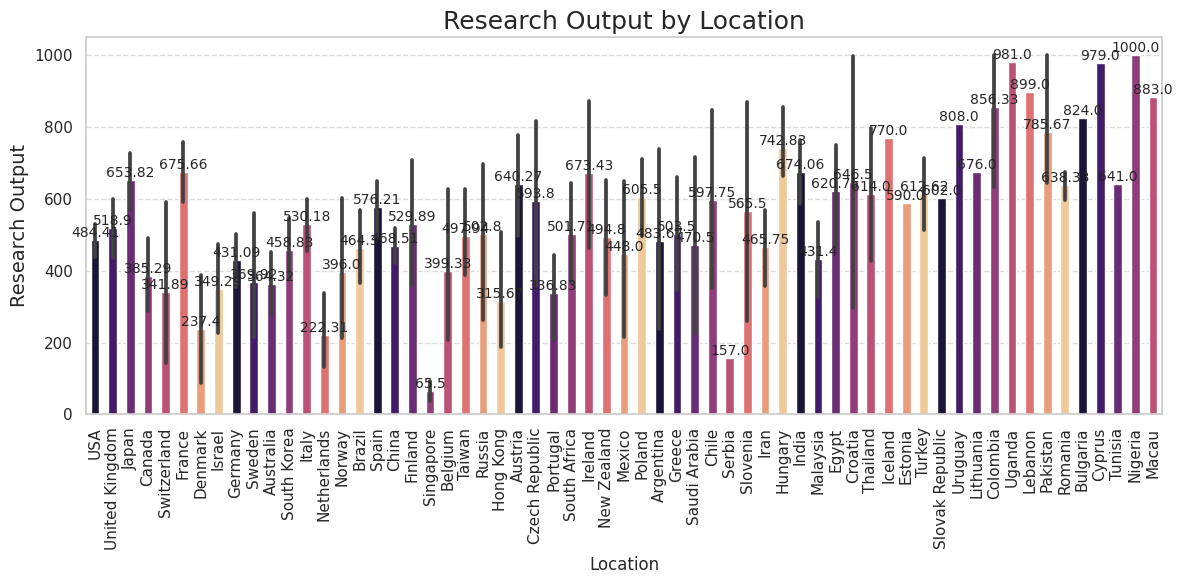

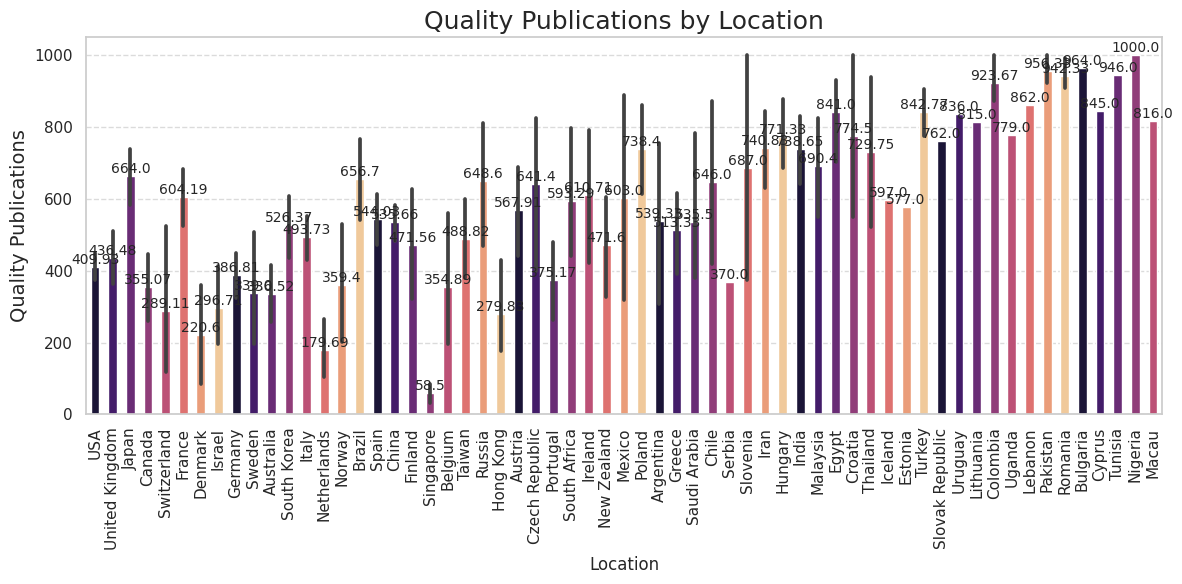

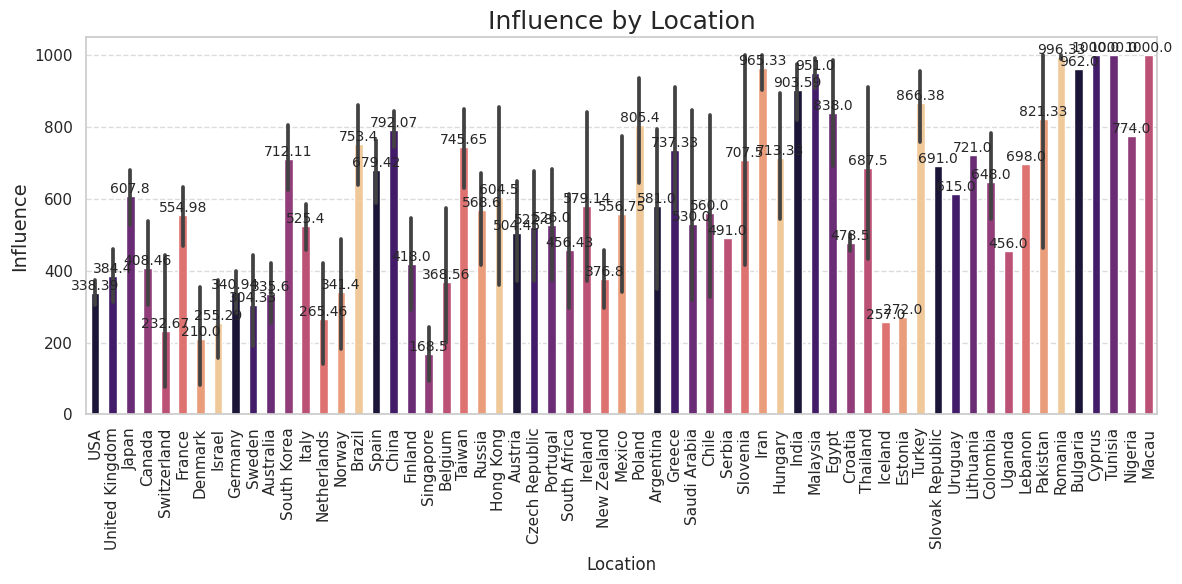

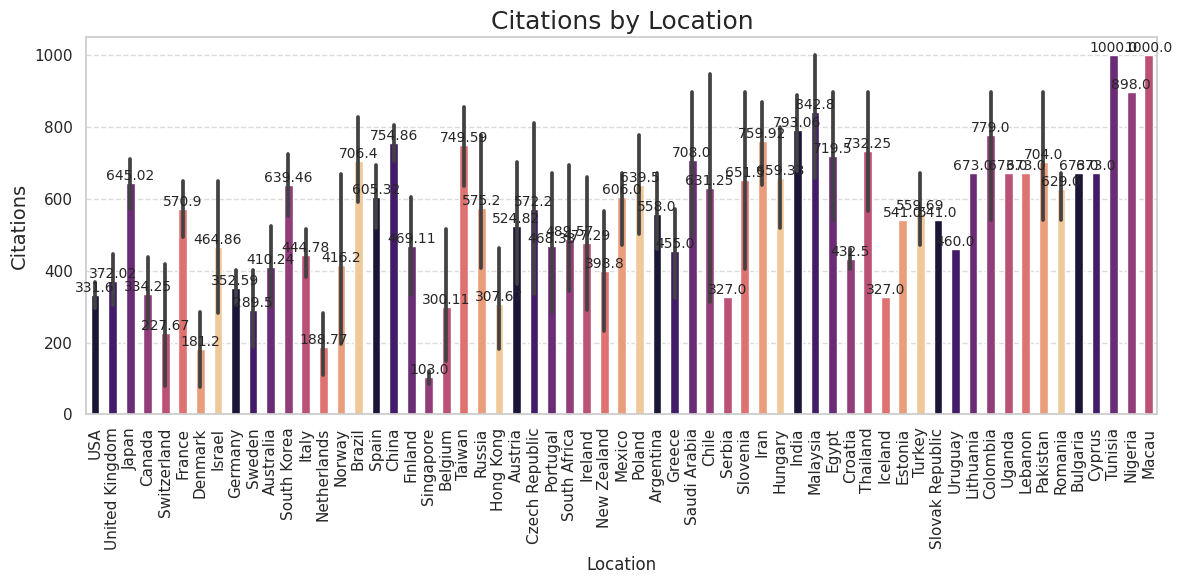

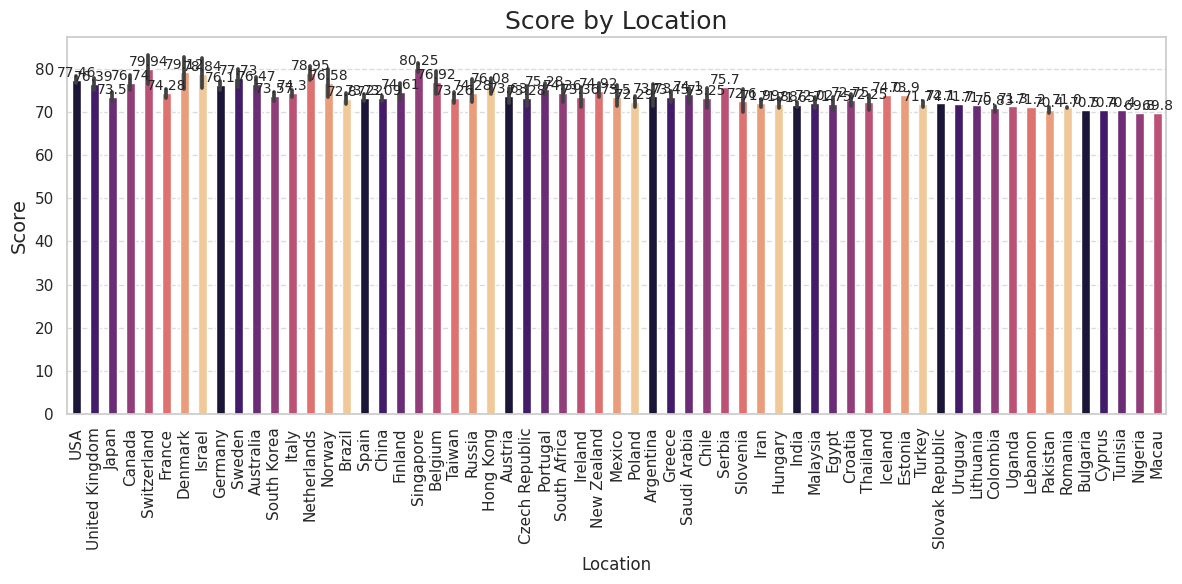

In [48]:
numeric_columns = df2.select_dtypes(include='number').columns

colors = sns.color_palette("magma", len(numeric_columns))

for index, column in enumerate(numeric_columns):
    plt.figure(figsize=(12, 6))
    plt.title(f'{column} by Location', fontsize=18)
    
    bars = sns.barplot(data=df2, x='Location', y=column, palette=colors, width=0.5)
    
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

    plt.ylabel(column, fontsize=14)
    plt.tight_layout()  
    plt.show()


<span style="color:#2E86C1; font-size:1.6em; font-weight:bold;">📊 **University Performance Metrics Analysis**</span>

### 🌟 Alumni Employment:
- **Chart:** This shows how well graduates from each university are doing in finding jobs.
- **Analysis:** Universities with higher employment rates indicate a stronger connection to the job market. If a university excels in this area, it likely reflects the quality of its programs and the preparedness of its graduates.

### 🔬 Research Output:
- **Chart:** This represents the volume and quality of research produced by the universities.
- **Analysis:** Schools that are more active in research are often viewed as credible institutions and have a greater impact on scientific and technological advancements.

### 📚 Quality Publications:
- **Chart:** This displays the number of papers published in reputable journals.
- **Analysis:** Strong performance in this area enhances a university’s academic reputation. Institutions that excel here usually gain higher respect in the academic community.

### 🌍 Influence:
- **Chart:** This illustrates the level of influence the universities have within the academic and research communities.
- **Analysis:** More influential universities are recognized as key thought leaders and can shape scientific policies and discussions.

### 📈 Citations:
- **Chart:** This tracks how often the university's research is cited by others.
- **Analysis:** A high citation count suggests that a university's research is impactful and widely recognized by other scholars.

### 🌐 Score:
- **Chart:** This represents an overall score based on various metrics.
- **Analysis:** A higher score reflects a university’s comprehensive performance across different areas. Institutions with better scores are generally viewed as more prestigious globally.

## 🏆 Conclusion:
Overall, these charts provide a clear picture of how universities perform across different metrics. Analyzing this data can help students, researchers, and decision-makers make more informed choices about universities and their programs.


In [49]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
from geopy.geocoders import Nominatim
import time

# "Marjan" as user agent
geolocator = Nominatim(user_agent="Marjan")

def get_coordinates(location):
    try:
        time.sleep(1)  
        loc = geolocator.geocode(location)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Add 'Latitude' and 'Longitude' columns 
df2[['Latitude', 'Longitude']] = df2['Location'].apply(get_coordinates)

df2.head()

World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2                    Stanford University             USA   
2           3  Massachusetts Institute of Technology             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank  Alumni Employment  Research Output  Quality Publications  \
0              1                  1                1                     1   
1              2                  3               10                     4   
2              3                 11               30                    15   
3              1                 19               12                     8   
4              2                 25                9                     5   

   Influence  Citations  Score   Latitude   Longitude  
0          1          1  100.0  39.783730 -100.445882  
1          3          2   96.7  39.783730 -100.445882  
2          2          6   95.1  39.783730 -100.445882  
3          6         19   94.0  54.702354   -3.276575  
4          7          4   93.2  54.702354   -3.276575

In [51]:
# Dictionary for mapping geographic coordinates to continents
def get_continent(latitude, longitude):
    if latitude is None or longitude is None:
        return None
    
    if latitude >= 0:  # North of the equator
        if longitude >= -25 and longitude <= 50:
            return "Europe"
        elif longitude > 50 and longitude <= 180:
            return "Asia"
        elif longitude > 180 or longitude < -100:
            return "America"  
        else:
            return "Africa"
    else:  # South of the equato
        if longitude >= -80 and longitude <= -30:
            return "America"
        elif longitude > -30 and longitude < 30:
            return "Africa"
        elif longitude >= 30 and longitude <= 180:
            return "Australia"
        else:
            return None  #No continent identified

df2['Continent'] = df2.apply(lambda row: get_continent(row['Latitude'], row['Longitude']), axis=1)

df2.head()

World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2                    Stanford University             USA   
2           3  Massachusetts Institute of Technology             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank  Alumni Employment  Research Output  Quality Publications  \
0              1                  1                1                     1   
1              2                  3               10                     4   
2              3                 11               30                    15   
3              1                 19               12                     8   
4              2                 25                9                     5   

   Influence  Citations  Score   Latitude   Longitude Continent  
0          1          1  100.0  39.783730 -100.445882   America  
1          3          2   96.7  39.783730 -100.445882   America  
2          2          6   95.1  39.783730 -100.445882   America  
3          6         19   94.0  54.702354   -3.276575    Europe  
4          7          4   93.2  54.702354   -3.276575    Europe

In [52]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [53]:
df2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Alumni Employment  Research Output  Quality Publications  \
0                1                  1                1                     1   
1                2                  3               10                     4   
2                3                 11               30                    15   
3                1                 19               12                     8   
4                2                 25                9                     5   
..             ...                ...              ...                   ...   
995              3               1000             1000                  1000   
996             17                716              798                   966   
997             56               1000             1000                  1000   
998             35               1000              881                  1000   
999            108                869              923                   904   

     Influence  Citations  Score   Latitude   Longitude Continent  
0            1          1  100.0  39.783730 -100.445882   America  
1            3          2   96.7  39.783730 -100.445882   America  
2            2          6   95.1  39.783730 -100.445882   America  
3            6         19   94.0  54.702354   -3.276575    Europe  
4            7          4   93.2  54.702354   -3.276575    Europe  
..         ...        ...    ...        ...         ...       ...  
995        464        673   69.8  30.330840   71.247499      Asia  
996       1000       1000   69.8  22.351115   78.667743      Asia  
997        811        673   69.8  36.574844  139.239418      Asia  
998       1000        898   69.8  36.638392  127.696119      Asia  
999        889       1000   69.8  35.000074  104.999927      Asia  

[1000 rows x 13 columns]

In [54]:
fig = px.scatter_mapbox(
    df2,
    lat='Latitude',
    lon='Longitude',
    hover_name='Institution',
    color='Score',
    hover_data=["Continent", "World Rank", "Score"],
    zoom=1, 
    mapbox_style="carto-positron" 
)

fig.update_traces(marker=dict(size=12, opacity=0.7), selector=dict(mode='markers'))  

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0}, 
    title='Locations of Universities with Scores',  
    title_x=0.5,  
    title_font=dict(size=20, color='black'),  
)

fig.show()

In [55]:
def plot_all_universities(df):
    fig = px.scatter_geo(
        df,
        lat='Latitude', 
        lon='Longitude', 
        hover_name='Institution',
        hover_data={'Location': True, 'Score': True},  
        title="Locations of Universities Around the World",  
        projection='mercator', 
        template='plotly', 
        opacity=0.8, 
        color_discrete_sequence=["blue"] 
    )

    fig.update_geos(
        showcountries=True, 
        showcoastlines=True, 
        showland=True,  
        landcolor="lightgray",  
        oceancolor="lightblue",  
        showocean=True  
    )

    fig.show()

plot_all_universities(df2)

In [56]:
columns_to_plot = ['Alumni Employment', 'Quality Publications', 'Citations', 'Influence']

for column in columns_to_plot:
    fig = px.choropleth(
        df2,
        locations='Location',    
        locationmode='country names',    
        color=column,   
        hover_name='Location', 
        hover_data=['Institution', 'Continent', 'World Rank', column], 
        color_continuous_scale=px.colors.sequential.Viridis, 
        projection="natural earth"  
    )

    fig.update_layout(
        title_text=f'University Locations by {column}', 
        geo=dict(showframe=False, showcoastlines=False)
    )

    fig.show()


## 🌟 Analysis of University Rankings 🌟

### 1. **Alumni Employment**
North American universities **🌎 excel** in alumni employment rankings, indicating that graduates from these institutions have higher success rates in securing employment post-graduation. This achievement reflects not only the **quality of education** 📚 provided but also the **strong industry connections** and **career support** available to students.

### 2. **Quality Publications**
Both North American universities and their counterparts in Australia showcase **🏆 superior rankings** regarding the quality of publications. This underscores that these institutions produce a **significant volume of high-impact research** 📈, contributing to advancements across various fields. The **collaboration among researchers** and the **availability of resources** are pivotal to this success.

### 3. **Citations**
North American universities lead in **📊 citation rankings**, indicating that their research is frequently referenced by other scholars. A high citation rate is a strong indicator of the **influence and relevance** of the research conducted at these institutions, suggesting a **robust academic reputation** on a global scale.

### 4. **Influence**
In terms of overall **✨ influence** within the academic community, North American universities maintain a **strong position**. This influence arises from their **leadership in research initiatives**, **innovative programs**, and the **significant contributions** of their alumni to diverse industries and academia.


# 

# **✅ Finish** ✅
